In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download awsaf49/brats20-dataset-training-validation

Dataset URL: https://www.kaggle.com/datasets/awsaf49/brats20-dataset-training-validation
License(s): CC0-1.0
100% 4.16G/4.16G [03:38<00:00, 31.1MB/s]
100% 4.16G/4.16G [03:38<00:00, 20.4MB/s]


In [ ]:
!unzip brats20-dataset-training-validation.zip

Archive:  brats20-dataset-training-validation.zip
  inflating: BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii  
  inflating: BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii  
  inflating: BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1.nii  
  inflating: BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii  
  inflating: BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t2.nii  
  inflating: BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002/BraTS20_Training_002_flair.nii  
  inflating: BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002/BraTS20_Training_002_seg.nii  
  inflating: BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002/BraTS20_Training_002_t1.nii  
  in

In [ ]:
import os
import cv2
import random
import glob
import shutil
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import skimage
import skimage.transform as transform
import skimage.util as util
import nibabel as nib

In [ ]:

train_dataset_path = "/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/"

In [ ]:
old_name = train_dataset_path + "BraTS20_Training_355/W39_1998.09.19_Segm.nii"
new_name = train_dataset_path + "BraTS20_Training_355/BraTS20_Training_355_seg.nii"

In [ ]:
try:
    os.rename(old_name, new_name)
    print("File has been re-named successfully!")
except:
    print("File is already renamed!")

File has been re-named successfully!


In [ ]:
 # load .nii file as a numpy array
test_image_flair = nib.load(train_dataset_path + "BraTS20_Training_335/BraTS20_Training_335_flair.nii").get_fdata()
print("Shape: ", test_image_flair.shape)
print("Dtype: ", test_image_flair.dtype)

Shape:  (240, 240, 155)
Dtype:  float64


In [ ]:
print("min: ", test_image_flair.min())
print("max: ", test_image_flair.max())

min:  0.0
max:  1037.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
test_image_flair = scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

In [ ]:
print("min: ", test_image_flair.min())
print("max: ", test_image_flair.max())

min:  0.0
max:  1.0


In [ ]:
# rescale t1
test_image_t1 = nib.load(train_dataset_path + "BraTS20_Training_335/BraTS20_Training_335_t1.nii").get_fdata()
test_image_t1 = scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

# rescale t1ce
test_image_t1ce = nib.load(train_dataset_path + "BraTS20_Training_335/BraTS20_Training_335_t1ce.nii").get_fdata()
test_image_t1ce = scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

# rescale t2
test_image_t2 = nib.load(train_dataset_path + "BraTS20_Training_335/BraTS20_Training_335_t2.nii").get_fdata()
test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

# not rescaling the segm mask
test_image_segm = nib.load(train_dataset_path + "BraTS20_Training_335/BraTS20_Training_335_seg.nii").get_fdata()

Slice Number: 95


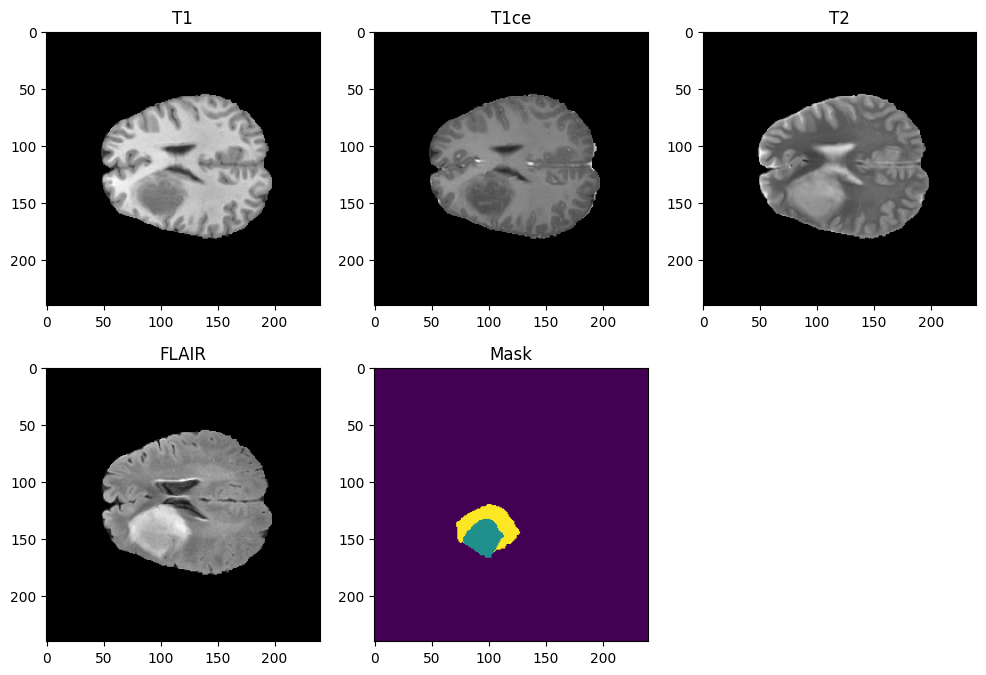

In [ ]:
slice = 95

print("Slice Number: " + str(slice))

plt.figure(figsize=(12, 8))

# T1
plt.subplot(2, 3, 1)
plt.imshow(test_image_t1[:,:,slice], cmap='gray')
plt.title('T1')

# T1ce
plt.subplot(2, 3, 2)
plt.imshow(test_image_t1ce[:,:,slice], cmap='gray')
plt.title('T1ce')

# T2
plt.subplot(2, 3, 3)
plt.imshow(test_image_t2[:,:,slice], cmap='gray')
plt.title('T2')

# Flair
plt.subplot(2, 3, 4)
plt.imshow(test_image_flair[:,:,slice], cmap='gray')
plt.title('FLAIR')

# Mask
plt.subplot(2, 3, 5)
plt.imshow(test_image_segm[:,:,slice])
plt.title('Mask')
plt.show()

In [ ]:
# Modality shape
print("Modality: ", test_image_t1.shape)

# Segmentation shape
print("Segmentation: ", test_image_segm.shape)

Modality:  (240, 240, 155)
Segmentation:  (240, 240, 155)


Slice number: 95


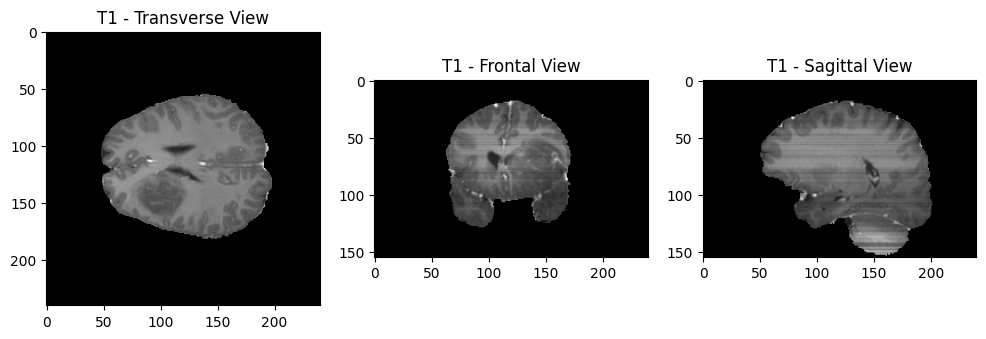

In [ ]:
slice = 95

print("Slice number: " + str(slice))

plt.figure(figsize=(12, 8))

# Apply a 90° rotation with an automatic resizing, otherwise the display is less obvious to analyze
# T1 - Transverse View
plt.subplot(1, 3, 1)
plt.imshow(test_image_t1ce[:,:,slice], cmap='gray')
plt.title('T1 - Transverse View')

# T1 - Frontal View
plt.subplot(1, 3, 2)
plt.imshow(transform.rotate(test_image_t1ce[:,slice,:], 90, resize=True), cmap='gray')
plt.title('T1 - Frontal View')

# T1 - Sagittal View
plt.subplot(1, 3, 3)
plt.imshow(transform.rotate(test_image_t1ce[slice,:,:], 90, resize=True), cmap='gray')
plt.title('T1 - Sagittal View')
plt.show()

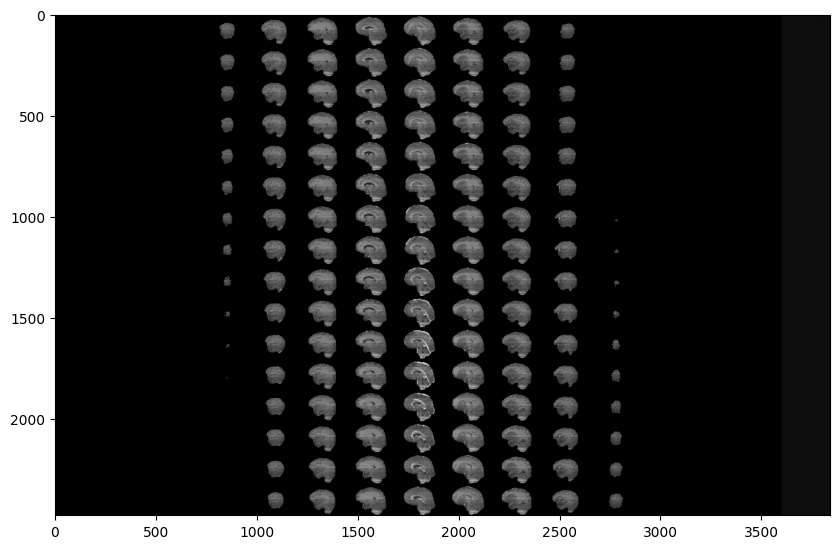

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)

# montage allows us to concatenate multiple images of the same size horizontally and vertically
plt.imshow(transform.rotate(util.montage(test_image_t1ce[:,:,:]), 90, resize=True), cmap ='gray');

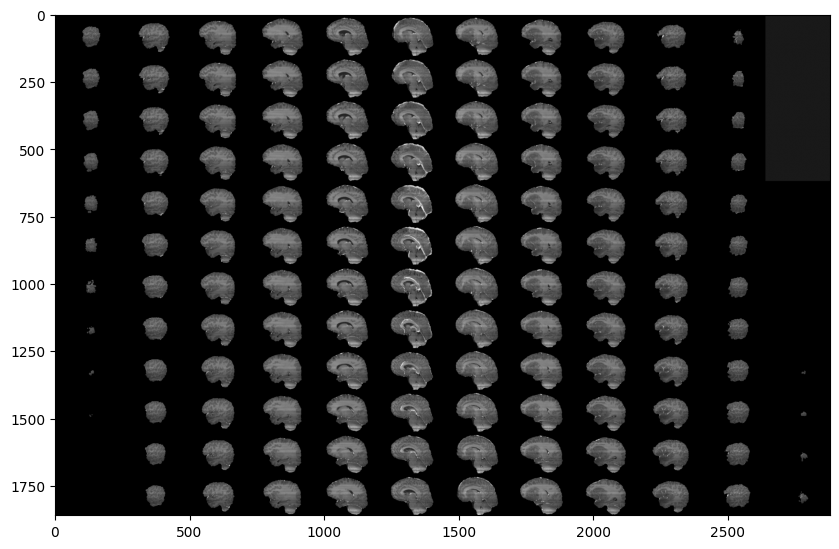

In [ ]:
# Skip 50:-50 slices since there is not much to see
plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.imshow(transform.rotate(util.montage(test_image_t1ce[50:-50,:,:]), 90, resize=True), cmap ='gray');

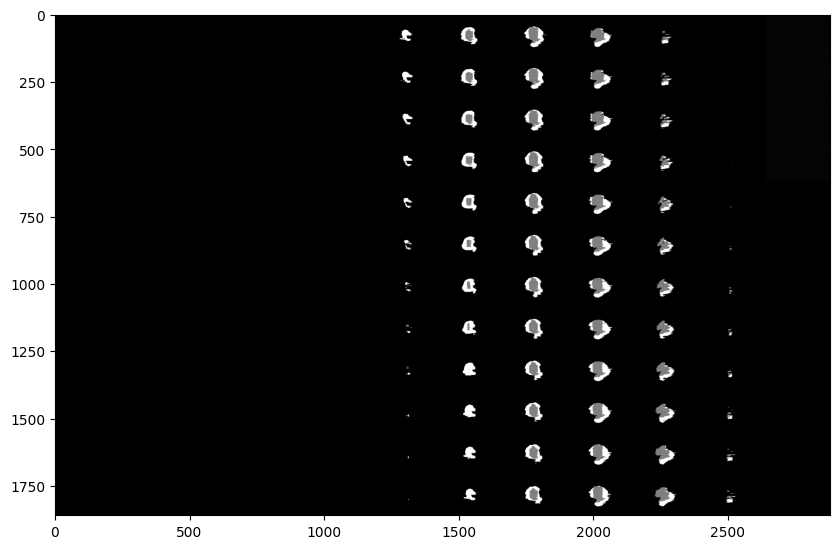

In [ ]:
# Skip 50:-50 slices since there is not much to see
plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.imshow(transform.rotate(util.montage(test_image_segm[50:-50,:,:]), 90, resize=True), cmap ='gray');

Now, let's focus on the segmentations provided by the experts. These segmentations provide critical information about the tumor:

- Location: Identifies the exact location of the tumor in the brain.
- Size and Shape: Measures the tumor's dimensions and form.
- Type: Helps differentiate between various tumor types.
- Heterogeneity: Reveals different components within the tumor (e.g., solid tissue, necrotic areas).
- Surrounding Tissue Involvement: Shows how the tumor interacts with adjacent brain structures.
- Cross-Modality Comparison: Provides a comprehensive view by comparing different imaging modalities.

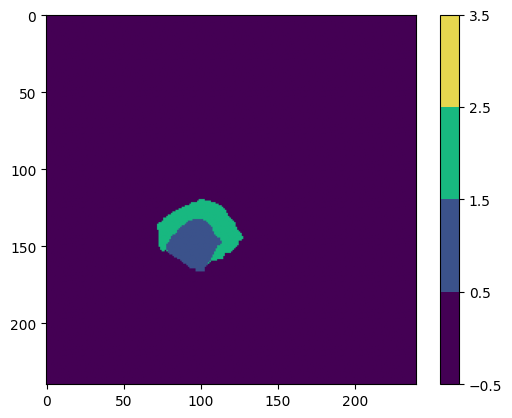

In [ ]:
# Plotting the segmantation
cmap = matplotlib.colors.ListedColormap(['#440054', '#3b528b', '#18b880', '#e6d74f'])
norm = matplotlib.colors.BoundaryNorm([-0.5, 0.5, 1.5, 2.5, 3.5], cmap.N)

# plotting the 95th slice
plt.imshow(test_image_segm[:,:,95], cmap=cmap, norm=norm)
plt.colorbar()
plt.show()

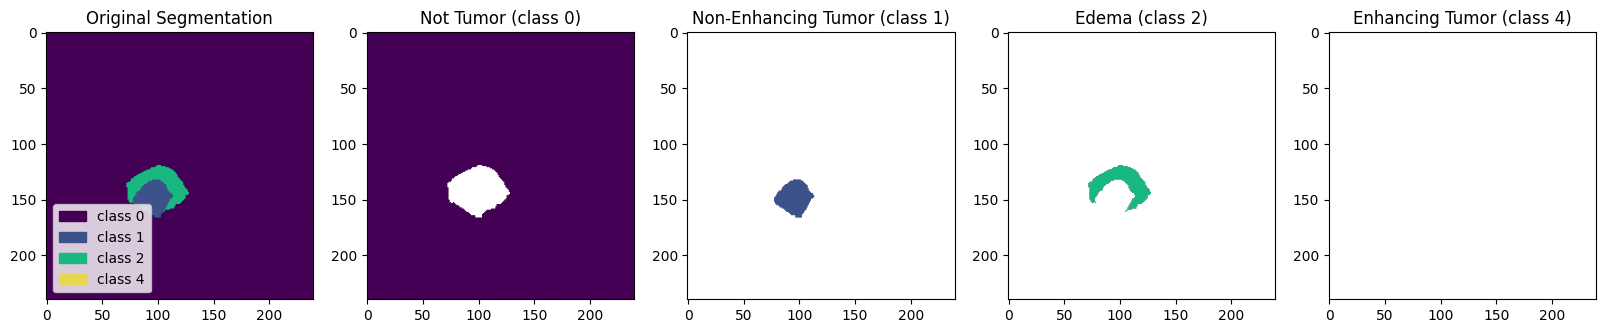

In [ ]:
# Isolation of class 0
seg_0 = test_image_segm.copy()
seg_0[seg_0 != 0] = np.nan

# Isolation of class 1
seg_1 = test_image_segm.copy()
seg_1[seg_1 != 1] = np.nan

# Isolation of class 2
seg_2 = test_image_segm.copy()
seg_2[seg_2 != 2] = np.nan

# Isolation of class 4
seg_4 = test_image_segm.copy()
seg_4[seg_4 != 4] = np.nan

# Define legend
class_names = ['class 0', 'class 1', 'class 2', 'class 4']
legend = [plt.Rectangle((0, 0), 1, 1, color=cmap(i), label=class_names[i]) for i in range(len(class_names))]

fig, ax = plt.subplots(1, 5, figsize=(20, 20))

ax[0].imshow(test_image_segm[:,:, slice], cmap=cmap, norm=norm)
ax[0].set_title('Original Segmentation')
ax[0].legend(handles=legend, loc='lower left')

ax[1].imshow(seg_0[:,:, slice], cmap=cmap, norm=norm)
ax[1].set_title('Not Tumor (class 0)')

ax[2].imshow(seg_1[:,:, slice], cmap=cmap, norm=norm)
ax[2].set_title('Non-Enhancing Tumor (class 1)')

ax[3].imshow(seg_2[:,:, slice], cmap=cmap, norm=norm)
ax[3].set_title('Edema (class 2)')

ax[4].imshow(seg_4[:,:, slice], cmap=cmap, norm=norm)
ax[4].set_title('Enhancing Tumor (class 4)')

plt.show()

To summarize our data exploration:

- Modalities: Each sample/patient has 4 different modalities (T1, T1CE, T2, and FLAIR), accompanied by a segmentation indicating tumor areas.
- Selected Modalities: We will focus on T1CE and FLAIR as they provide complementary information about the brain's anatomy and tissue contrast.
3D Images: Each image is 3D and can be analyzed through 3 different planes composed of 2D slices.
- Informative Slices: Many slices contain little or no information. We will use slices in the (50:-50) interval. You can customize this range, but note that changing it may affect training time.
- Segmentation Classes: Segmentation images contain 1 to 4 classes. Class 4 will be reassigned to 3 since class 3 is missing.
- Background Class: Class 0 (background) is over-represented. Cropping might remove important information, so we will keep the images as they are.

## Dataset preparation

In [ ]:
from sklearn.model_selection import train_test_split
# lists of directories with studies
train_and_val_directories = [f.path for f in os.scandir(train_dataset_path) if f.is_dir()]

def pathListIntoIds(dirList):
    x = []
    for i in range(0,len(dirList)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x

train_and_test_ids = pathListIntoIds(train_and_val_directories);

train_test_ids, val_ids = train_test_split(train_and_test_ids,test_size=0.2)
train_ids, test_ids = train_test_split(train_test_ids,test_size=0.15)

In [ ]:
# Print data distribution (Train: 68%, Test: 12%, Val: 20%)
print(f"Train length: {len(train_ids)}")
print(f"Validation length: {len(val_ids)}")
print(f"Test length: {len(test_ids)}")

Train length: 250
Validation length: 74
Test length: 45


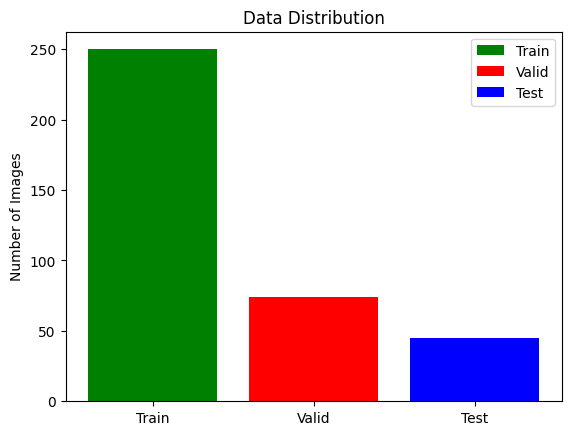

In [ ]:
plt.bar(["Train","Valid","Test"],
        [len(train_ids), len(val_ids), len(test_ids)],
        align='center',
        color=[ 'green','red', 'blue'],
        label=["Train", "Valid", "Test"]
       )

plt.legend()

plt.ylabel('Number of Images')
plt.title('Data Distribution')

plt.show()

In [ ]:
### Data generator
# Define seg-areas
SEGMENT_CLASSES = {
    0 : 'NOT tumor',
    1 : 'NECROTIC/CORE', # or NON-ENHANCING tumor CORE
    2 : 'EDEMA',
    3 : 'ENHANCING' # original 4 -> converted into 3
}

# Select Slices and Image Size
VOLUME_SLICES = 100
VOLUME_START_AT = 22 # first slice of volume that we will include
IMG_SIZE=128

In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import nibabel as nib
import cv2
import os
import numpy as np
import torch
from torch.utils.data import Dataset
import nibabel as nib
import cv2

class BrainTumorDataset(Dataset):
    def __init__(
        self,
        list_IDs,
        dim=(IMG_SIZE, IMG_SIZE),
        n_channels=2,
        volume_slices=VOLUME_SLICES,
        volume_start_at=VOLUME_START_AT,
        dataset_path=train_dataset_path
    ):
        self.list_IDs = list_IDs
        self.dim = dim
        self.n_channels = n_channels
        self.volume_slices = volume_slices
        self.volume_start_at = volume_start_at
        self.dataset_path = dataset_path

    def __len__(self):
        return len(self.list_IDs)

    def __getitem__(self, idx):
        case_id = self.list_IDs[idx]
        case_path = os.path.join(self.dataset_path, case_id)

        flair = nib.load(os.path.join(case_path, f"{case_id}_flair.nii")).get_fdata()
        t1ce  = nib.load(os.path.join(case_path, f"{case_id}_t1ce.nii")).get_fdata()
        seg   = nib.load(os.path.join(case_path, f"{case_id}_seg.nii")).get_fdata()

        # Inputs: (S, C, H, W)
        X = np.zeros((self.volume_slices, self.n_channels, *self.dim), dtype=np.float32)
        # Targets: (S, H, W) — class indices
        y = np.zeros((self.volume_slices, *self.dim), dtype=np.int64)

        for j in range(self.volume_slices):
            slice_idx = j + self.volume_start_at

            X[j, 0] = cv2.resize(flair[:, :, slice_idx], self.dim)
            X[j, 1] = cv2.resize(t1ce[:, :, slice_idx], self.dim)

            seg_slice = seg[:, :, slice_idx]
            seg_slice[seg_slice == 4] = 3  # 4 → 3

            y[j] = cv2.resize(
                seg_slice,
                self.dim,
                interpolation=cv2.INTER_NEAREST
            )

        # Normalize inputs
        X /= np.max(X) + 1e-8

        return torch.from_numpy(X), torch.from_numpy(y)


In [ ]:
train_dataset = BrainTumorDataset(train_ids)
val_dataset   = BrainTumorDataset(val_ids)
test_dataset  = BrainTumorDataset(test_ids)

train_loader = DataLoader(
    train_dataset,
    batch_size=1,
    shuffle=True,
    num_workers=4,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=4
)

test_loader = DataLoader(
    test_dataset,
    batch_size=100,
    shuffle=False,
    num_workers=4
)


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

def display_slice_and_segmentation(flair, t1ce, segmentation):
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))

    axes[0].imshow(flair, cmap="gray")
    axes[0].set_title("Flair")
    axes[0].axis("off")

    axes[1].imshow(t1ce, cmap="gray")
    axes[1].set_title("T1CE")
    axes[1].axis("off")

    axes[2].imshow(segmentation)
    axes[2].set_title("Segmentation")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
# dice loss as defined above for 4 classes
def dice_coef(y_true, y_pred, smooth=1.0):
    class_num = 4
    for i in range(class_num):
        y_true_f = K.flatten(y_true[:,:,:,i])
        y_pred_f = K.flatten(y_pred[:,:,:,i])
        intersection = K.sum(y_true_f * y_pred_f)
        loss = ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))
        if i == 0:
            total_loss = loss
        else:
            total_loss = total_loss + loss
    total_loss = total_loss / class_num
    return total_loss

In [ ]:
# Define per class evaluation of dice coef
def dice_coef_necrotic(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,1] * y_pred[:,:,:,1]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,1])) + K.sum(K.square(y_pred[:,:,:,1])) + epsilon)

def dice_coef_edema(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,2] * y_pred[:,:,:,2]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,2])) + K.sum(K.square(y_pred[:,:,:,2])) + epsilon)

def dice_coef_enhancing(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,3] * y_pred[:,:,:,3]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,3])) + K.sum(K.square(y_pred[:,:,:,3])) + epsilon)

In [ ]:
# Computing Precision
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision


# Computing Sensitivity
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())


# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

## Segmentation model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_init="he"):
        super().__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

        if kernel_init == "he":
            for m in self.modules():
                if isinstance(m, nn.Conv2d):
                    nn.init.kaiming_normal_(m.weight)
                    if m.bias is not None:
                        nn.init.zeros_(m.bias)

    def forward(self, x):
        return self.conv(x)


In [ ]:
def center_crop(tensor, target_tensor):
    _, _, h, w = target_tensor.shape
    _, _, H, W = tensor.shape
    delta_h = (H - h) // 2
    delta_w = (W - w) // 2
    return tensor[:, :, delta_h:delta_h+h, delta_w:delta_w+w]


In [ ]:
class UNet(nn.Module):
    def __init__(self, in_channels=2, num_classes=4, dropout=0.3):
        super().__init__()

        # Encoder
        self.conv1 = DoubleConv(in_channels, 32)
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = DoubleConv(32, 64)
        self.pool2 = nn.MaxPool2d(2)

        self.conv3 = DoubleConv(64, 128)
        self.pool3 = nn.MaxPool2d(2)

        self.conv4 = DoubleConv(128, 256)
        self.pool4 = nn.MaxPool2d(2)

        self.conv5 = DoubleConv(256, 512)
        self.drop5 = nn.Dropout(dropout)

        # Decoder - use ConvTranspose2d for proper upsampling
        self.up6 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.conv6 = DoubleConv(512, 256)

        self.up7 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.conv7 = DoubleConv(256, 128)

        self.up8 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.conv8 = DoubleConv(128, 64)

        self.up9 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2)
        self.conv9 = DoubleConv(64, 32)

        # Output
        self.out = nn.Conv2d(32, num_classes, kernel_size=1)

    def forward(self, x):
        # Encoder
        c1 = self.conv1(x)
        p1 = self.pool1(c1)

        c2 = self.conv2(p1)
        p2 = self.pool2(c2)

        c3 = self.conv3(p2)
        p3 = self.pool3(c3)

        c4 = self.conv4(p3)
        p4 = self.pool4(c4)

        c5 = self.drop5(self.conv5(p4))

        # Decoder
        u6 = self.up6(c5)
        c6 = self.conv6(torch.cat([center_crop(c4, u6), u6], dim=1))

        u7 = self.up7(c6)
        c7 = self.conv7(torch.cat([center_crop(c3, u7), u7], dim=1))

        u8 = self.up8(c7)
        c8 = self.conv8(torch.cat([center_crop(c2, u8), u8], dim=1))

        u9 = self.up9(c8)
        c9 = self.conv9(torch.cat([center_crop(c1, u9), u9], dim=1))

        return self.out(c9)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNet(in_channels=2, num_classes=4, dropout=0.3).to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    epoch_loss = 0.0

    for X, y in loader:
        # X: (B, S, C, H, W)
        B, S, C, H, W = X.shape

        X = X.view(B * S, C, H, W).to(device)
        y = y.view(B * S, H, W).to(device)

        optimizer.zero_grad()
        logits = model(X)           # (B*S, 4, H, W)
        loss = criterion(logits, y)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss / len(loader)


In [ ]:
@torch.no_grad()
def validate(model, loader, criterion):
    model.eval()
    val_loss = 0.0

    for X, y in loader:
        B, S, C, H, W = X.shape
        X = X.view(B * S, C, H, W).to(device)
        y = y.view(B * S, H, W).to(device)

        logits = model(X)
        loss = criterion(logits, y)

        val_loss += loss.item()

    return val_loss / len(loader)


In [ ]:
epochs = 50

for epoch in range(epochs):
    train_loss = train_one_epoch(model, train_loader, optimizer, criterion)
    val_loss = validate(model, val_loader, criteriom)

    print(f"Epoch {epoch+1:03d} | Train: {train_loss:.4f} | Val: {val_loss:.4f}")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 001 | Train: 0.2324 | Val: 0.0699
Epoch 002 | Train: 0.0754 | Val: 0.0660
Epoch 003 | Train: 0.0681 | Val: 0.0508
Epoch 004 | Train: 0.0533 | Val: 0.0492
Epoch 005 | Train: 0.0536 | Val: 0.0525
Epoch 006 | Train: 0.0489 | Val: 0.0487
Epoch 007 | Train: 0.0481 | Val: 0.0382
Epoch 008 | Train: 0.0432 | Val: 0.0391
Epoch 009 | Train: 0.0422 | Val: 0.0662
Epoch 010 | Train: 0.0427 | Val: 0.0384
Epoch 011 | Train: 0.0377 | Val: 0.0329
Epoch 012 | Train: 0.0384 | Val: 0.0410
Epoch 013 | Train: 0.0375 | Val: 0.0315
Epoch 014 | Train: 0.0345 | Val: 0.0347
Epoch 015 | Train: 0.0344 | Val: 0.0310
Epoch 016 | Train: 0.0322 | Val: 0.0313
Epoch 017 | Train: 0.0331 | Val: 0.0342
Epoch 018 | Train: 0.0310 | Val: 0.0290
Epoch 019 | Train: 0.0292 | Val: 0.0267
Epoch 020 | Train: 0.0298 | Val: 0.0303
Epoch 021 | Train: 0.0287 | Val: 0.0249
Epoch 022 | Train: 0.0261 | Val: 0.0263
Epoch 023 | Train: 0.0252 | Val: 0.0241
Epoch 024 | Train: 0.0248 | Val: 0.0231
Epoch 025 | Train: 0.0236 | Val: 0.0228


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp 'model_weights/model_weights.pth' '/content/drive/My Drive/model_weights.pth'

In [ ]:
!cp 'model_weights/entire_model.pth' '/content/drive/My Drive/entire_model.pt'

In [ ]:
def mean_iou(pred, target, num_classes=4):
    """Calculate Mean IoU"""
    ious = []
    pred = pred.view(-1)
    target = target.view(-1)

    for cls in range(num_classes):
        pred_inds = pred == cls
        target_inds = target == cls
        intersection = (pred_inds & target_inds).long().sum().item()
        union = pred_inds.long().sum().item() + target_inds.long().sum().item() - intersection

        if union == 0:
            ious.append(float('nan'))
        else:
            ious.append(intersection / union)

    valid_ious = [iou for iou in ious if not np.isnan(iou)]
    return np.mean(valid_ious) if valid_ious else 0.0

def dice_coef(pred, target, smooth=1e-6):
    """Dice coefficient for binary masks"""
    pred = pred.contiguous().view(-1).float()
    target = target.contiguous().view(-1).float()
    intersection = (pred * target).sum()
    return (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)

def dice_coef_multilabel(pred, target, num_classes=4):
    """Dice coefficient averaged across all classes"""
    dice = 0
    for cls in range(num_classes):
        pred_cls = (pred == cls).float()
        target_cls = (target == cls).float()
        dice += dice_coef(pred_cls, target_cls)
    return dice / num_classes

def dice_coef_necrotic(pred, target):
    """Dice for class 1 (necrotic)"""
    return dice_coef((pred == 1).float(), (target == 1).float())

def dice_coef_edema(pred, target):
    """Dice for class 2 (edema)"""
    return dice_coef((pred == 2).float(), (target == 2).float())

def dice_coef_enhancing(pred, target):
    """Dice for class 3 (enhancing)"""
    return dice_coef((pred == 3).float(), (target == 3).float())

def pixel_accuracy(pred, target):
    """Calculate pixel-wise accuracy"""
    correct = (pred == target).float().sum()
    total = target.numel()
    return correct / total

In [ ]:
model_loaded = UNet(in_channels=2, num_classes=4, dropout=0.3).to(device)
model_loaded.load_state_dict(torch.load('/content/drive/MyDrive/model_weights.pth'))
model_loaded.to(device)
model_loaded.eval()

UNet(
  (conv1): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(2, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
  )
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
  )
  (pool

In [ ]:
class BrainTumorDataset(Dataset):
    def __init__(
        self,
        list_IDs,
        dim=(IMG_SIZE, IMG_SIZE),
        n_channels=2,
        volume_slices=VOLUME_SLICES,
        volume_start_at=VOLUME_START_AT,
        dataset_path=train_dataset_path,
        return_flattened=True  # New parameter
    ):
        self.list_IDs = list_IDs
        self.dim = dim
        self.n_channels = n_channels
        self.volume_slices = volume_slices
        self.volume_start_at = volume_start_at
        self.dataset_path = dataset_path
        self.return_flattened = return_flattened

    def __len__(self):
        if self.return_flattened:
            return len(self.list_IDs) * self.volume_slices
        return len(self.list_IDs)

    def __getitem__(self, idx):
        if self.return_flattened:
            # Calculate which volume and which slice
            volume_idx = idx // self.volume_slices
            slice_idx_in_volume = idx % self.volume_slices
            case_id = self.list_IDs[volume_idx]
        else:
            case_id = self.list_IDs[idx]

        case_path = os.path.join(self.dataset_path, case_id)

        flair = nib.load(os.path.join(case_path, f"{case_id}_flair.nii")).get_fdata()
        t1ce  = nib.load(os.path.join(case_path, f"{case_id}_t1ce.nii")).get_fdata()
        seg   = nib.load(os.path.join(case_path, f"{case_id}_seg.nii")).get_fdata()

        if self.return_flattened:
            # Return single slice
            X = np.zeros((self.n_channels, *self.dim), dtype=np.float32)
            y = np.zeros(self.dim, dtype=np.int64)

            slice_idx = slice_idx_in_volume + self.volume_start_at

            X[0] = cv2.resize(flair[:, :, slice_idx], self.dim)
            X[1] = cv2.resize(t1ce[:, :, slice_idx], self.dim)

            seg_slice = seg[:, :, slice_idx]
            seg_slice[seg_slice == 4] = 3
            y = cv2.resize(seg_slice, self.dim, interpolation=cv2.INTER_NEAREST)

            # Normalize
            X /= np.max(X) + 1e-8

            return torch.from_numpy(X), torch.from_numpy(y)
        else:
            # Return all slices (original behavior)
            X = np.zeros((self.volume_slices, self.n_channels, *self.dim), dtype=np.float32)
            y = np.zeros((self.volume_slices, *self.dim), dtype=np.int64)

            for j in range(self.volume_slices):
                slice_idx = j + self.volume_start_at

                X[j, 0] = cv2.resize(flair[:, :, slice_idx], self.dim)
                X[j, 1] = cv2.resize(t1ce[:, :, slice_idx], self.dim)

                seg_slice = seg[:, :, slice_idx]
                seg_slice[seg_slice == 4] = 3

                y[j] = cv2.resize(
                    seg_slice,
                    self.dim,
                    interpolation=cv2.INTER_NEAREST
                )

            X /= np.max(X) + 1e-8

            return torch.from_numpy(X), torch.from_numpy(y)


# Use it
test_dataset = BrainTumorDataset(
    test_ids,
    return_flattened=True  # Now returns individual slices
)

test_loader = DataLoader(
    test_dataset,
    batch_size=100,
    shuffle=False,
    num_workers=4
)

In [ ]:
from tqdm import tqdm

def test_model(model, test_loader, device):
    """Test model and calculate all metrics"""
    model.eval()

    metrics = {
        'pixel_accuracy': [],
        'mean_iou': [],
        'dice_coef': [],
        'dice_necrotic': [],
        'dice_edema': [],
        'dice_enhancing': []
    }

    all_predictions = []
    all_targets = []

    print("Testing model...")
    with torch.no_grad():
        for batch_idx, (images, targets) in enumerate(tqdm(test_loader)):
            images = images.to(device)
            targets = targets.to(device)

            # Forward pass
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)

            # Store for later visualization
            all_predictions.append(predictions.cpu().numpy())
            all_targets.append(targets.cpu().numpy())

            # Calculate metrics for each sample in batch
            for pred, target in zip(predictions, targets):
                metrics['pixel_accuracy'].append(pixel_accuracy(pred, target).item())
                metrics['mean_iou'].append(mean_iou(pred, target, num_classes=4))
                metrics['dice_coef'].append(dice_coef_multilabel(pred, target, num_classes=4).item())
                metrics['dice_necrotic'].append(dice_coef_necrotic(pred, target).item())
                metrics['dice_edema'].append(dice_coef_edema(pred, target).item())
                metrics['dice_enhancing'].append(dice_coef_enhancing(pred, target).item())

    # Calculate average metrics
    avg_metrics = {k: np.mean(v) for k, v in metrics.items()}
    std_metrics = {k: np.std(v) for k, v in metrics.items()}

    return avg_metrics, std_metrics, all_predictions, all_targets


In [ ]:
avg_metrics, std_metrics, all_predictions, all_targets = test_model(model_loaded, test_loader, device)

# Print results
print("\n" + "="*60)
print("TEST RESULTS")
print("="*60)
print(f"Pixel Accuracy:      {avg_metrics['pixel_accuracy']:.4f} ± {std_metrics['pixel_accuracy']:.4f}")
print(f"Mean IoU:            {avg_metrics['mean_iou']:.4f} ± {std_metrics['mean_iou']:.4f}")
print(f"Dice Coefficient:    {avg_metrics['dice_coef']:.4f} ± {std_metrics['dice_coef']:.4f}")
print(f"Dice Necrotic:       {avg_metrics['dice_necrotic']:.4f} ± {std_metrics['dice_necrotic']:.4f}")
print(f"Dice Edema:          {avg_metrics['dice_edema']:.4f} ± {std_metrics['dice_edema']:.4f}")
print(f"Dice Enhancing:      {avg_metrics['dice_enhancing']:.4f} ± {std_metrics['dice_enhancing']:.4f}")
print("="*60)

Testing model...


100%|██████████| 45/45 [04:26<00:00,  5.92s/it]


TEST RESULTS
Pixel Accuracy:      0.9948 ± 0.0071
Mean IoU:            0.7449 ± 0.2291
Dice Coefficient:    0.8207 ± 0.1858
Dice Necrotic:       0.7478 ± 0.3837
Dice Edema:          0.7498 ± 0.3202
Dice Enhancing:      0.7867 ± 0.3360


In [ ]:
# Visualize some predictions
def visualize_results(predictions, targets, num_samples=5):
    """Visualize predictions vs ground truth"""
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, num_samples * 4))

    if num_samples == 1:
        axes = axes.reshape(1, -1)

    for i in range(min(num_samples, len(predictions))):
        pred = predictions[i][0]  # Remove batch dimension
        target = targets[i][0]

        # Ground truth
        axes[i, 0].imshow(target, cmap='tab10', vmin=0, vmax=3)
        axes[i, 0].set_title('Ground Truth')
        axes[i, 0].axis('off')

        # Prediction
        axes[i, 1].imshow(pred, cmap='tab10', vmin=0, vmax=3)
        axes[i, 1].set_title('Prediction')
        axes[i, 1].axis('off')

        # Difference map
        diff = (pred != target).astype(float)
        axes[i, 2].imshow(diff, cmap='RdYlGn_r', vmin=0, vmax=1)
        acc = (pred == target).mean()
        axes[i, 2].set_title(f'Error Map (Acc: {acc:.2%})')
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.savefig('test_results.png', dpi=150, bbox_inches='tight')
    plt.show()

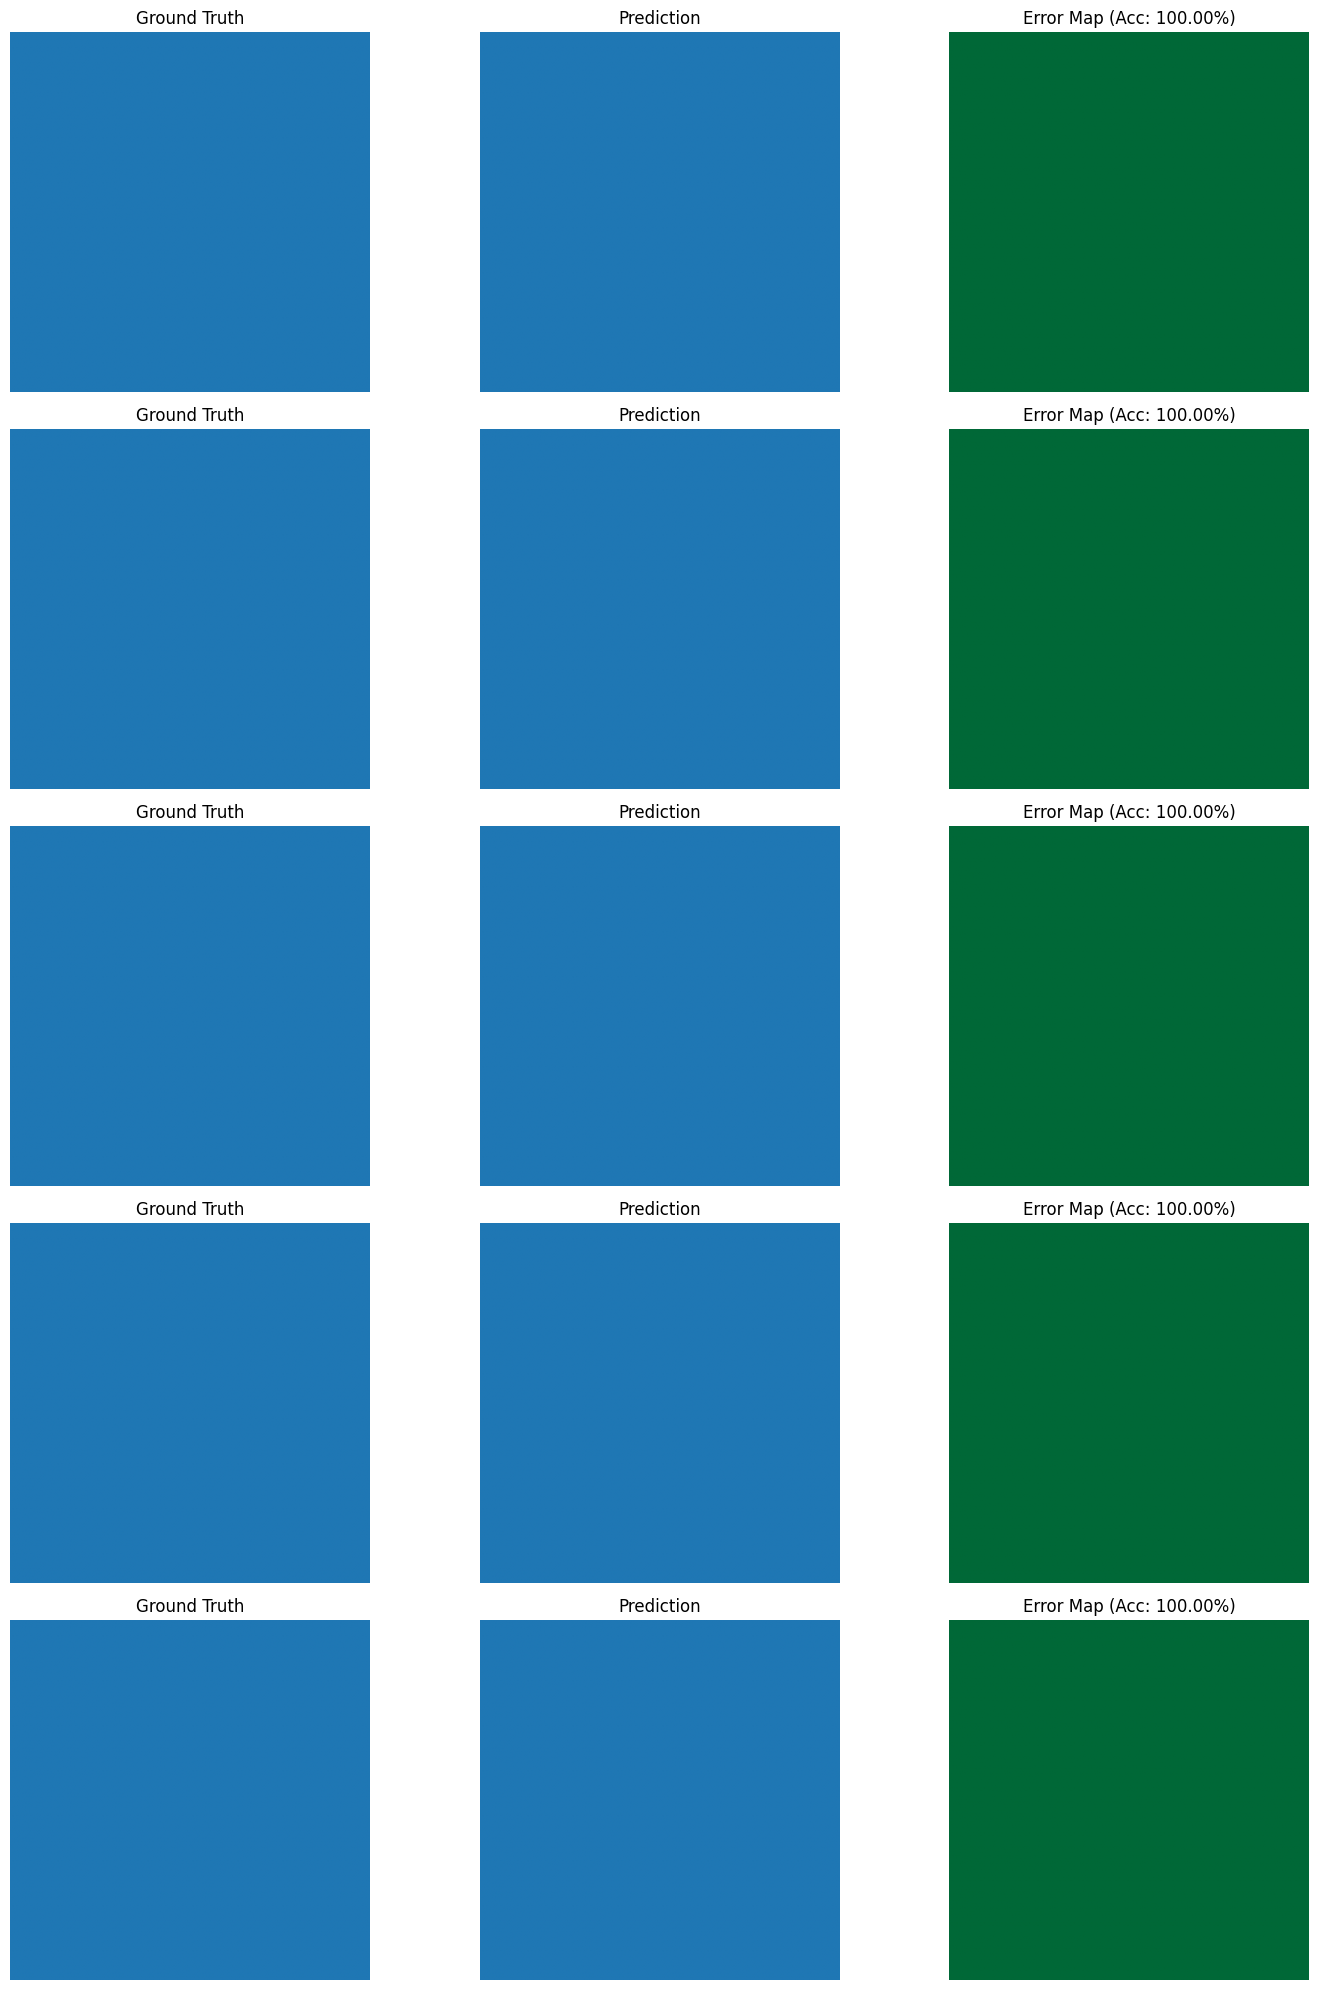

In [ ]:

# Visualize results
visualize_results(all_predictions, all_targets, num_samples=5)

In [ ]:
def class_wise_metrics(predictions, targets, num_classes=4):
    """Calculate metrics for each class - FIXED VERSION"""
    class_names = ['Background', 'Necrotic', 'Edema', 'Enhancing']

    print("\nCLASS-WISE PERFORMANCE:")
    print("="*60)

    for cls in range(num_classes):
        ious = []
        dices = []
        pixel_counts = []  # Track how many images have this class

        for pred, target in zip(predictions, targets):
            pred = torch.from_numpy(pred[0]) if isinstance(pred, np.ndarray) else pred[0]
            target = torch.from_numpy(target[0]) if isinstance(target, np.ndarray) else target[0]

            pred_cls = (pred == cls).float()
            target_cls = (target == cls).float()

            # Count pixels of this class in target
            class_pixels = target_cls.sum().item()
            pixel_counts.append(class_pixels)

            # IoU for this class
            intersection = (pred_cls * target_cls).sum().item()
            union = pred_cls.sum().item() + target_cls.sum().item() - intersection

            # Only calculate if class exists in target
            if target_cls.sum().item() > 0:
                if union > 0:
                    ious.append(intersection / union)
                else:
                    ious.append(0.0)  # No prediction, but class exists

                # Dice for this class
                dices.append(dice_coef(pred_cls, target_cls).item())

        # Calculate averages
        num_images_with_class = sum(1 for c in pixel_counts if c > 0)
        avg_iou = np.mean(ious) if ious else 0.0
        avg_dice = np.mean(dices) if dices else 0.0

        print(f"{class_names[cls]:12} - IoU: {avg_iou:.4f}, Dice: {avg_dice:.4f} "
              f"(present in {num_images_with_class}/{len(predictions)} images)")

    print("="*60)


# Better version with more details
def detailed_class_metrics(predictions, targets, num_classes=4):
    """Detailed class-wise analysis"""
    class_names = ['Background', 'Necrotic', 'Edema', 'Enhancing']

    print("\nDETAILED CLASS-WISE METRICS:")
    print("="*80)
    print(f"{'Class':<12} {'IoU':<8} {'Dice':<8} {'Precision':<10} {'Recall':<8} {'Support':<10}")
    print("="*80)

    for cls in range(num_classes):
        tp_total = 0
        fp_total = 0
        fn_total = 0
        tn_total = 0

        for pred, target in zip(predictions, targets):
            pred = torch.from_numpy(pred[0]) if isinstance(pred, np.ndarray) else pred[0]
            target = torch.from_numpy(target[0]) if isinstance(target, np.ndarray) else target[0]

            pred_cls = (pred == cls)
            target_cls = (target == cls)

            tp = (pred_cls & target_cls).sum().item()
            fp = (pred_cls & ~target_cls).sum().item()
            fn = (~pred_cls & target_cls).sum().item()
            tn = (~pred_cls & ~target_cls).sum().item()

            tp_total += tp
            fp_total += fp
            fn_total += fn
            tn_total += tn

        # Calculate metrics from total counts
        iou = tp_total / (tp_total + fp_total + fn_total) if (tp_total + fp_total + fn_total) > 0 else 0.0
        dice = (2 * tp_total) / (2 * tp_total + fp_total + fn_total) if (2 * tp_total + fp_total + fn_total) > 0 else 0.0
        precision = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0.0
        recall = tp_total / (tp_total + fn_total) if (tp_total + fn_total) > 0 else 0.0
        support = tp_total + fn_total  # Total pixels of this class in ground truth

        print(f"{class_names[cls]:<12} {iou:<8.4f} {dice:<8.4f} {precision:<10.4f} {recall:<8.4f} {support:<10d}")

    print("="*80)


# Also check class distribution
def analyze_class_distribution(predictions, targets, num_classes=4):
    """Analyze class distribution in predictions vs targets"""
    class_names = ['Background', 'Necrotic', 'Edema', 'Enhancing']

    print("\nCLASS DISTRIBUTION:")
    print("="*60)

    pred_counts = {cls: 0 for cls in range(num_classes)}
    target_counts = {cls: 0 for cls in range(num_classes)}

    for pred, target in zip(predictions, targets):
        pred_flat = pred.flatten()
        target_flat = target.flatten()

        for cls in range(num_classes):
            pred_counts[cls] += (pred_flat == cls).sum()
            target_counts[cls] += (target_flat == cls).sum()

    total_pixels = sum(target_counts.values())

    print(f"{'Class':<12} {'Target %':<12} {'Predicted %':<12} {'Difference':<12}")
    print("-"*60)
    for cls in range(num_classes):
        target_pct = 100 * target_counts[cls] / total_pixels
        pred_pct = 100 * pred_counts[cls] / total_pixels
        diff = pred_pct - target_pct

        print(f"{class_names[cls]:<12} {target_pct:<12.2f} {pred_pct:<12.2f} {diff:+12.2f}")

    print("="*60)


# Use all three
class_wise_metrics(all_predictions, all_targets)
detailed_class_metrics(all_predictions, all_targets)
analyze_class_distribution(all_predictions, all_targets)


CLASS-WISE PERFORMANCE:
Background   - IoU: 0.9998, Dice: 0.9999 (present in 45/45 images)
Necrotic     - IoU: 0.0000, Dice: 0.0000 (present in 0/45 images)
Edema        - IoU: 0.0000, Dice: 0.0000 (present in 0/45 images)
Enhancing    - IoU: 0.0000, Dice: 0.0000 (present in 0/45 images)

DETAILED CLASS-WISE METRICS:
Class        IoU      Dice     Precision  Recall   Support   
Background   0.9998   0.9999   1.0000     0.9998   737280    
Necrotic     0.0000   0.0000   0.0000     0.0000   0         
Edema        0.0000   0.0000   0.0000     0.0000   0         
Enhancing    0.0000   0.0000   0.0000     0.0000   0         

CLASS DISTRIBUTION:
Class        Target %     Predicted %  Difference  
------------------------------------------------------------
Background   98.59        98.60               +0.01
Necrotic     0.27         0.13                -0.14
Edema        0.85         0.93                +0.08
Enhancing    0.29         0.34                +0.05


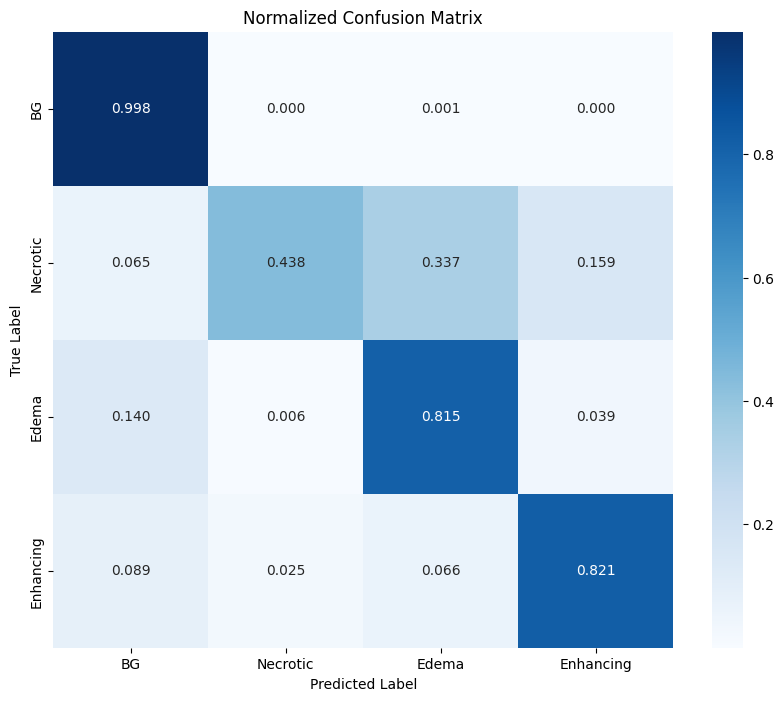

In [ ]:
# Confusion matrix
def plot_confusion_matrix(predictions, targets, num_classes=4):
    """Plot confusion matrix"""
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    all_preds = np.concatenate([p.flatten() for p in predictions])
    all_targets = np.concatenate([t.flatten() for t in targets])

    cm = confusion_matrix(all_targets, all_preds, labels=range(num_classes))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Blues',
                xticklabels=['BG', 'Necrotic', 'Edema', 'Enhancing'],
                yticklabels=['BG', 'Necrotic', 'Edema', 'Enhancing'])
    plt.title('Normalized Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
    plt.show()

plot_confusion_matrix(all_predictions, all_targets)

In [ ]:
def infer_single_slice(model, image_slice, device='cuda'):
    """
    Perform inference on a single 2D slice

    Args:
        model: Trained UNet model
        image_slice: Single slice tensor of shape (2, H, W) or numpy array
        device: 'cuda' or 'cpu'

    Returns:
        prediction: Segmentation mask (H, W) with class labels [0, 1, 2, 3]
        probabilities: Class probabilities (4, H, W)
    """
    model.eval()

    with torch.no_grad():
        # Convert to tensor if numpy
        if isinstance(image_slice, np.ndarray):
            image_slice = torch.from_numpy(image_slice).float()

        # Ensure correct shape
        if image_slice.dim() == 2:
            raise ValueError(f"Expected 2 channels, got shape {image_slice.shape}")

        # Add batch dimension: (2, H, W) -> (1, 2, H, W)
        if image_slice.dim() == 3:
            image_slice = image_slice.unsqueeze(0)

        # Move to device
        image_slice = image_slice.to(device)

        # Forward pass
        logits = model(image_slice)  # (1, 4, H, W)

        # Get probabilities and predictions
        probabilities = F.softmax(logits, dim=1)  # (1, 4, H, W)
        prediction = torch.argmax(probabilities, dim=1)  # (1, H, W)

        # Remove batch dimension and move to CPU
        prediction = prediction.squeeze(0).cpu().numpy()  # (H, W)
        probabilities = probabilities.squeeze(0).cpu().numpy()  # (4, H, W)

    return prediction, probabilities

In [ ]:
def visualize_slice(image, prediction, ground_truth, probabilities, slice_idx):
    """
    Visualize a single slice with prediction and ground truth
    """
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    # Input channels
    axes[0].imshow(image[0], cmap='gray')
    axes[0].set_title(f'FLAIR - Slice {slice_idx}')
    axes[0].axis('off')

    axes[1].imshow(image[1], cmap='gray')
    axes[1].set_title(f'T1CE - Slice {slice_idx}')
    axes[1].axis('off')

    # Prediction
    axes[2].imshow(prediction, cmap='tab10', vmin=0, vmax=3)
    axes[2].set_title('Prediction')
    axes[2].axis('off')

    # Ground truth
    axes[3].imshow(ground_truth, cmap='tab10', vmin=0, vmax=3)
    axes[3].set_title('Ground Truth')
    axes[3].axis('off')

    # Probability maps
    class_names = ['Background', 'Necrotic', 'Edema', 'Enhancing']
    for i in range(4):
        im = axes[4 + i].imshow(probabilities[i], cmap='viridis', vmin=0, vmax=1)
        axes[4 + i].set_title(f'{class_names[i]} Probability')
        axes[4 + i].axis('off')
        plt.colorbar(im, ax=axes[4 + i], fraction=0.046)

    plt.tight_layout()
    plt.show()


In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import nibabel as nib
import cv2
import matplotlib.pyplot as plt
import os

# ============================================================================
# PREDICTION FUNCTIONS FOR PYTORCH
# ============================================================================

def predictByPath(model, case_path, case, device):
    """
    Predict segmentation for a brain tumor case

    Args:
        model: Trained PyTorch UNet model
        case_path: Path to case directory
        case: Case ID (e.g., '001')
        device: torch device

    Returns:
        predictions: numpy array (VOLUME_SLICES, IMG_SIZE, IMG_SIZE, 4)
                    with probabilities for each class
    """
    model.eval()

    # Load FLAIR and T1CE volumes
    vol_path = os.path.join(case_path, f'BraTS20_Training_{case}_flair.nii')
    flair = nib.load(vol_path).get_fdata()

    vol_path = os.path.join(case_path, f'BraTS20_Training_{case}_t1ce.nii')
    ce = nib.load(vol_path).get_fdata()

    # Prepare input array (VOLUME_SLICES, 2, IMG_SIZE, IMG_SIZE)
    X = np.zeros((VOLUME_SLICES, 2, IMG_SIZE, IMG_SIZE), dtype=np.float32)

    for j in range(VOLUME_SLICES):
        slice_idx = j + VOLUME_START_AT
        X[j, 0] = cv2.resize(flair[:, :, slice_idx], (IMG_SIZE, IMG_SIZE))
        X[j, 1] = cv2.resize(ce[:, :, slice_idx], (IMG_SIZE, IMG_SIZE))

    # Normalize (SAME AS TRAINING)
    X = X / (np.max(X) + 1e-8)

    # Convert to torch tensor
    X_tensor = torch.from_numpy(X).float().to(device)

    # Predict
    with torch.no_grad():
        outputs = model(X_tensor)  # Shape: (VOLUME_SLICES, 4, IMG_SIZE, IMG_SIZE)
        probabilities = F.softmax(outputs, dim=1)  # Convert to probabilities

        # Convert to numpy and transpose to (VOLUME_SLICES, IMG_SIZE, IMG_SIZE, 4)
        predictions = probabilities.cpu().numpy()
        predictions = np.transpose(predictions, (0, 2, 3, 1))

    return predictions


def showPredictsById(model, case, device, start_slice=60):
    """
    Visualize predictions for a specific case

    Args:
        model: Trained PyTorch UNet model
        case: Case ID (e.g., '001')
        device: torch device
        start_slice: Which slice to visualize (relative to VOLUME_START_AT)
    """
    # Construct paths
    case_path = os.path.join('/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData', f'BraTS20_Training_{case}')

    # Load ground truth and original image
    gt = nib.load(os.path.join(case_path, f'BraTS20_Training_{case}_seg.nii')).get_fdata()
    origImage = nib.load(os.path.join(case_path, f'BraTS20_Training_{case}_flair.nii')).get_fdata()

    # Get predictions
    print(f"Predicting case {case}...")
    p = predictByPath(model, case_path, case, device)

    # Validate slice index
    if start_slice >= VOLUME_SLICES:
        print(f"Warning: start_slice {start_slice} >= VOLUME_SLICES {VOLUME_SLICES}")
        start_slice = VOLUME_SLICES - 1
        print(f"Using slice {start_slice} instead")

    # Extract class probabilities
    background = p[:, :, :, 0]
    necrotic = p[:, :, :, 1]
    edema = p[:, :, :, 2]
    enhancing = p[:, :, :, 3]

    # Get predicted classes (argmax)
    predicted_classes = np.argmax(p, axis=-1)

    # Create visualization
    plt.figure(figsize=(20, 6))
    f, axarr = plt.subplots(1, 7, figsize=(20, 6))

    slice_idx = start_slice + VOLUME_START_AT
    orig_slice = cv2.resize(origImage[:, :, slice_idx], (IMG_SIZE, IMG_SIZE))
    gt_slice = cv2.resize(gt[:, :, slice_idx], (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST)

    # 0. Original FLAIR image
    axarr[0].imshow(orig_slice, cmap="gray")
    axarr[0].set_title('Original FLAIR', fontsize=12, fontweight='bold')
    axarr[0].axis('off')

    # 1. Ground truth overlay
    axarr[1].imshow(orig_slice, cmap="gray")
    axarr[1].imshow(gt_slice, cmap="tab10", interpolation='none', alpha=0.5, vmin=0, vmax=3)
    axarr[1].set_title('Ground Truth', fontsize=12, fontweight='bold')
    axarr[1].axis('off')

    # 2. All classes predicted (argmax)
    axarr[2].imshow(orig_slice, cmap="gray")
    axarr[2].imshow(predicted_classes[start_slice], cmap="tab10", interpolation='none', alpha=0.5, vmin=0, vmax=3)
    axarr[2].set_title('All Classes Predicted', fontsize=12, fontweight='bold')
    axarr[2].axis('off')

    # 3. Necrotic core probability
    axarr[3].imshow(orig_slice, cmap="gray")
    axarr[3].imshow(necrotic[start_slice], cmap="Reds", interpolation='none', alpha=0.6, vmin=0, vmax=1)
    axarr[3].set_title('Necrotic Core', fontsize=12, fontweight='bold')
    axarr[3].axis('off')

    # 4. Edema probability
    axarr[4].imshow(orig_slice, cmap="gray")
    axarr[4].imshow(edema[start_slice], cmap="Greens", interpolation='none', alpha=0.6, vmin=0, vmax=1)
    axarr[4].set_title('Edema', fontsize=12, fontweight='bold')
    axarr[4].axis('off')

    # 5. Enhancing tumor probability
    axarr[5].imshow(orig_slice, cmap="gray")
    axarr[5].imshow(enhancing[start_slice], cmap="Blues", interpolation='none', alpha=0.6, vmin=0, vmax=1)
    axarr[5].set_title('Enhancing Tumor', fontsize=12, fontweight='bold')
    axarr[5].axis('off')

    # 6. Comparison (side-by-side GT and prediction)
    comparison = np.zeros((IMG_SIZE, IMG_SIZE * 2, 3))

    # Ground truth side (left)
    gt_colored = np.zeros((IMG_SIZE, IMG_SIZE, 3))
    gt_colored[gt_slice == 1] = [1, 0, 0]  # Red for necrotic
    gt_colored[gt_slice == 2] = [0, 1, 0]  # Green for edema
    gt_colored[gt_slice == 3] = [0, 0, 1]  # Blue for enhancing

    # Prediction side (right)
    pred_colored = np.zeros((IMG_SIZE, IMG_SIZE, 3))
    pred_slice = predicted_classes[start_slice]
    pred_colored[pred_slice == 1] = [1, 0, 0]
    pred_colored[pred_slice == 2] = [0, 1, 0]
    pred_colored[pred_slice == 3] = [0, 0, 1]

    comparison[:, :IMG_SIZE] = gt_colored
    comparison[:, IMG_SIZE:] = pred_colored

    axarr[6].imshow(comparison)
    axarr[6].set_title('GT (left) vs Pred (right)', fontsize=12, fontweight='bold')
    axarr[6].axis('off')

    plt.tight_layout()
    plt.savefig(f'prediction_case_{case}_slice_{start_slice}.png', dpi=150, bbox_inches='tight')
    plt.show()

    # Print statistics
    print(f"\nCase {case} - Slice {start_slice} Statistics:")
    print(f"Ground Truth - Necrotic: {(gt_slice == 1).sum()} pixels")
    print(f"Ground Truth - Edema: {(gt_slice == 2).sum()} pixels")
    print(f"Ground Truth - Enhancing: {(gt_slice == 3).sum()} pixels")
    print(f"\nPredicted - Necrotic: {(pred_slice == 1).sum()} pixels")
    print(f"Predicted - Edema: {(pred_slice == 2).sum()} pixels")
    print(f"Predicted - Enhancing: {(pred_slice == 3).sum()} pixels")

    # Calculate Dice scores for this slice
    for cls, name in enumerate(['Background', 'Necrotic', 'Edema', 'Enhancing']):
        gt_cls = (gt_slice == cls)
        pred_cls = (pred_slice == cls)
        intersection = (gt_cls & pred_cls).sum()
        dice = (2 * intersection) / (gt_cls.sum() + pred_cls.sum() + 1e-8)
        print(f"Dice {name}: {dice:.4f}")


def showMultipleSlices(model, case, device, slices=[60, 70, 80, 90]):
    """
    Show predictions for multiple slices of the same case

    Args:
        model: Trained PyTorch UNet model
        case: Case ID (e.g., '001')
        device: torch device
        slices: List of slice indices to visualize (relative to VOLUME_START_AT)
    """
    case_path = os.path.join('/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData', f'BraTS20_Training_{case}')

    gt = nib.load(os.path.join(case_path, f'BraTS20_Training_{case}_seg.nii')).get_fdata()
    origImage = nib.load(os.path.join(case_path, f'BraTS20_Training_{case}_flair.nii')).get_fdata()

    print(f"Predicting case {case}...")
    p = predictByPath(model, case_path, case, device)
    predicted_classes = np.argmax(p, axis=-1)

    # Validate and filter slice indices
    valid_slices = [s for s in slices if s < VOLUME_SLICES]
    if len(valid_slices) < len(slices):
        invalid = [s for s in slices if s >= VOLUME_SLICES]
        print(f"Warning: Removed invalid slices {invalid} (VOLUME_SLICES={VOLUME_SLICES})")
        slices = valid_slices

    if len(slices) == 0:
        print("Error: No valid slices to display!")
        return

    fig, axes = plt.subplots(len(slices), 3, figsize=(15, 5 * len(slices)))

    # Handle case when there's only one slice
    if len(slices) == 1:
        axes = axes.reshape(1, -1)

    for idx, slice_num in enumerate(slices):
        slice_idx = slice_num + VOLUME_START_AT
        orig_slice = cv2.resize(origImage[:, :, slice_idx], (IMG_SIZE, IMG_SIZE))
        gt_slice = cv2.resize(gt[:, :, slice_idx], (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST)

        # Original
        axes[idx, 0].imshow(orig_slice, cmap="gray")
        axes[idx, 0].set_title(f'Slice {slice_num} - Original')
        axes[idx, 0].axis('off')

        # Ground truth
        axes[idx, 1].imshow(orig_slice, cmap="gray")
        axes[idx, 1].imshow(gt_slice, cmap="tab10", alpha=0.5, vmin=0, vmax=3)
        axes[idx, 1].set_title('Ground Truth')
        axes[idx, 1].axis('off')

        # Prediction
        axes[idx, 2].imshow(orig_slice, cmap="gray")
        axes[idx, 2].imshow(predicted_classes[slice_num], cmap="tab10", alpha=0.5, vmin=0, vmax=3)
        axes[idx, 2].set_title('Prediction')
        axes[idx, 2].axis('off')

    plt.tight_layout()
    plt.savefig(f'prediction_case_{case}_multiple_slices.png', dpi=150, bbox_inches='tight')
    plt.show()


Processing case: 030
Predicting case 030...


<Figure size 2000x600 with 0 Axes>

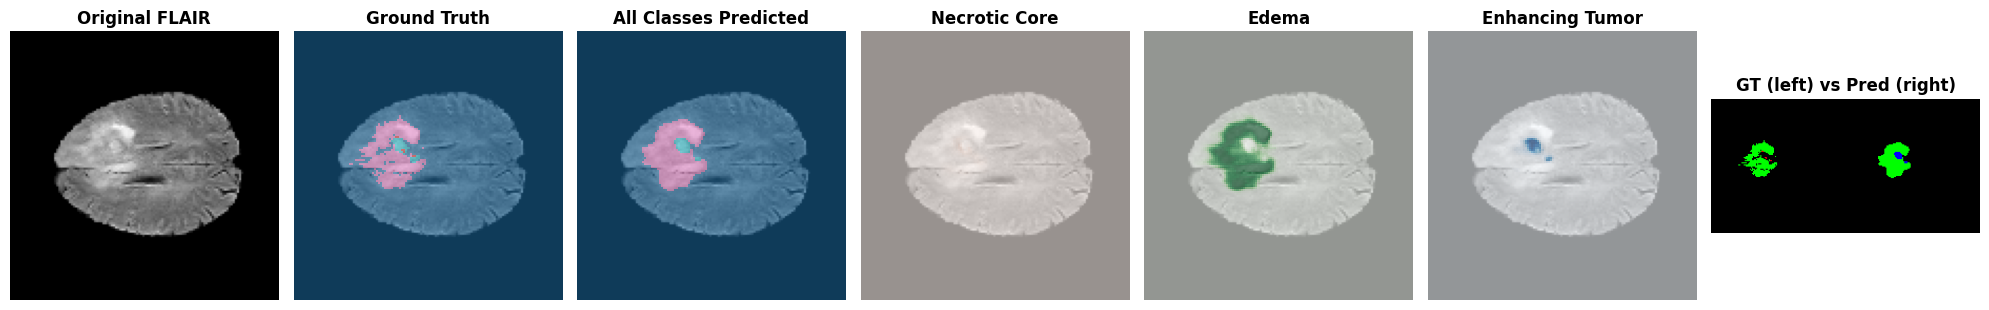


Case 030 - Slice 70 Statistics:
Ground Truth - Necrotic: 7 pixels
Ground Truth - Edema: 546 pixels
Ground Truth - Enhancing: 0 pixels

Predicted - Necrotic: 0 pixels
Predicted - Edema: 629 pixels
Predicted - Enhancing: 51 pixels
Dice Background: 0.9956
Dice Necrotic: 0.0000
Dice Edema: 0.8817
Dice Enhancing: 0.0000

Processing case: 336
Predicting case 336...


<Figure size 2000x600 with 0 Axes>

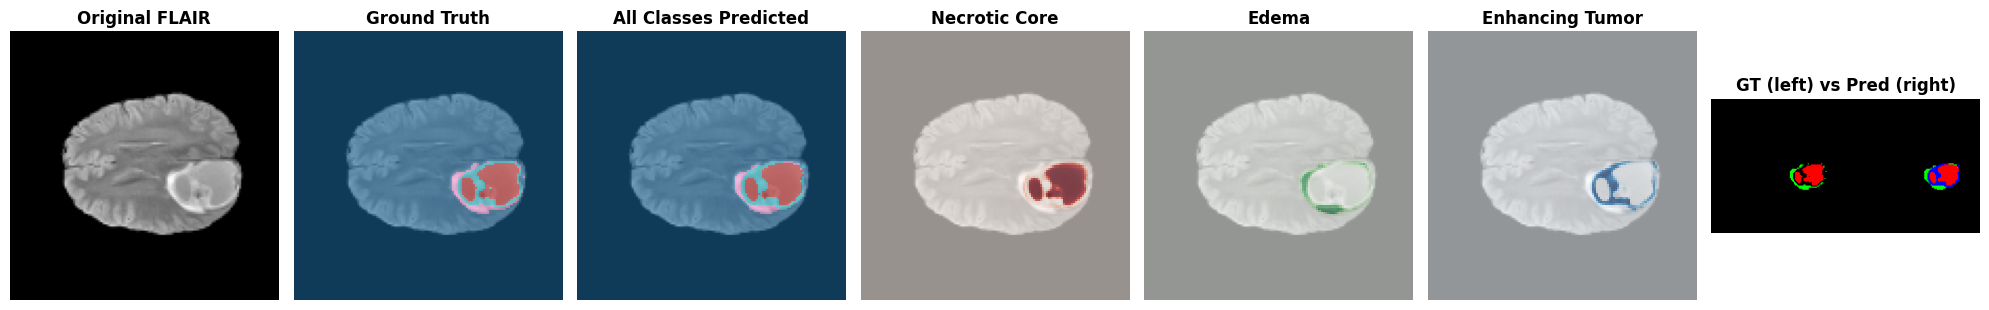


Case 336 - Slice 70 Statistics:
Ground Truth - Necrotic: 357 pixels
Ground Truth - Edema: 122 pixels
Ground Truth - Enhancing: 0 pixels

Predicted - Necrotic: 355 pixels
Predicted - Edema: 98 pixels
Predicted - Enhancing: 200 pixels
Dice Background: 0.9990
Dice Necrotic: 0.9635
Dice Edema: 0.7455
Dice Enhancing: 0.0000

Processing case: 067
Predicting case 067...


<Figure size 2000x600 with 0 Axes>

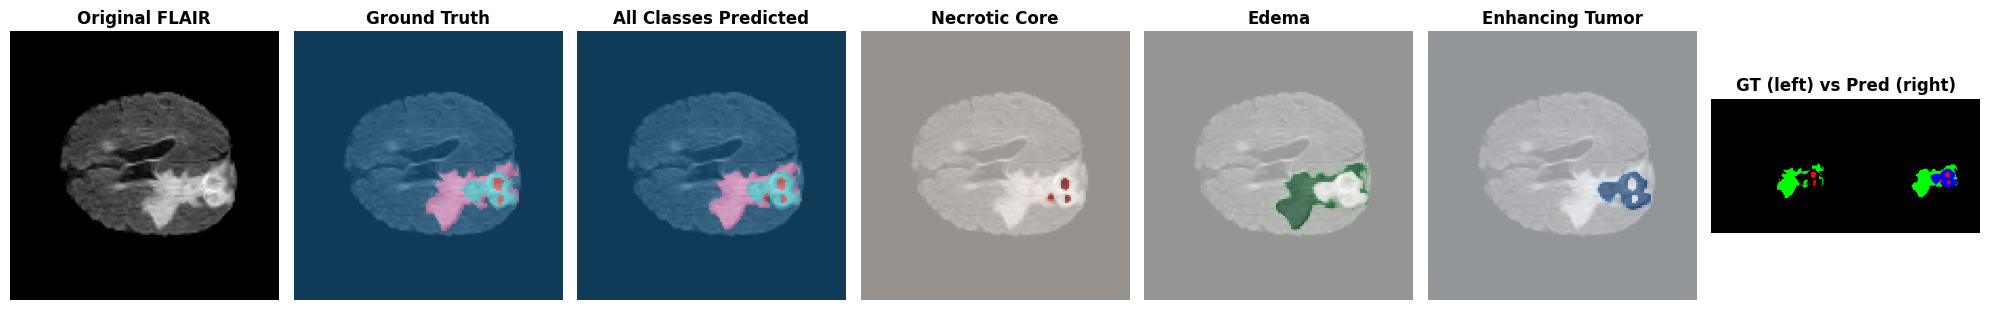


Case 067 - Slice 70 Statistics:
Ground Truth - Necrotic: 40 pixels
Ground Truth - Edema: 478 pixels
Ground Truth - Enhancing: 0 pixels

Predicted - Necrotic: 37 pixels
Predicted - Edema: 452 pixels
Predicted - Enhancing: 254 pixels
Dice Background: 0.9973
Dice Necrotic: 0.7273
Dice Edema: 0.8925
Dice Enhancing: 0.0000

Processing case: 289
Predicting case 289...


<Figure size 2000x600 with 0 Axes>

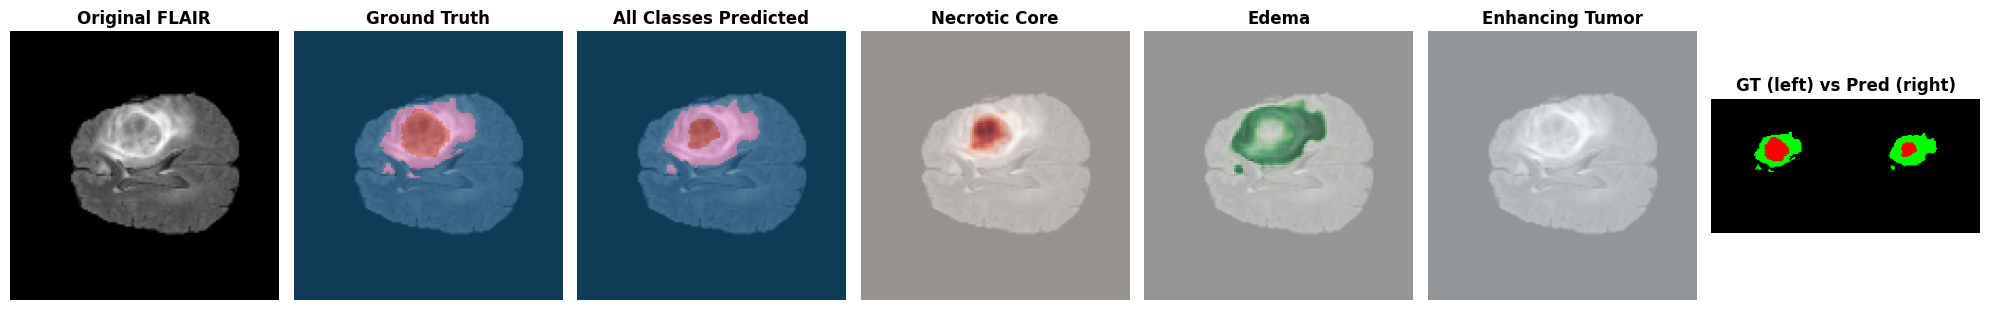


Case 289 - Slice 70 Statistics:
Ground Truth - Necrotic: 397 pixels
Ground Truth - Edema: 645 pixels
Ground Truth - Enhancing: 0 pixels

Predicted - Necrotic: 158 pixels
Predicted - Edema: 824 pixels
Predicted - Enhancing: 0 pixels
Dice Background: 0.9970
Dice Necrotic: 0.5694
Dice Edema: 0.7747
Dice Enhancing: 0.0000

Processing case: 227
Predicting case 227...


<Figure size 2000x600 with 0 Axes>

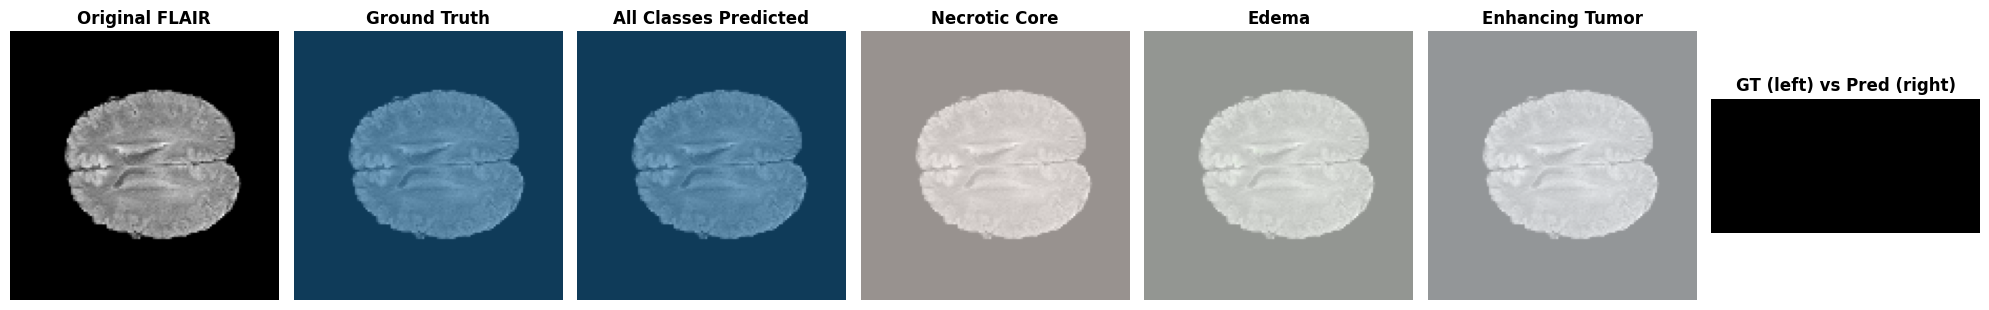


Case 227 - Slice 70 Statistics:
Ground Truth - Necrotic: 0 pixels
Ground Truth - Edema: 0 pixels
Ground Truth - Enhancing: 0 pixels

Predicted - Necrotic: 0 pixels
Predicted - Edema: 0 pixels
Predicted - Enhancing: 0 pixels
Dice Background: 1.0000
Dice Necrotic: 0.0000
Dice Edema: 0.0000
Dice Enhancing: 0.0000


In [ ]:

# Example 3: Predict and save for multiple test cases
for test_id in test_ids[:5]:  # First 5 test cases
    case = test_id[-3:]
    print(f"\n{'='*60}")
    print(f"Processing case: {case}")
    print('='*60)

    showPredictsById(
        model=model_loaded,
        case=case,
        device=device,
        start_slice=70
    )

In [ ]:
def predict_segmentation(model, sample_path, device):
    """
    Predict segmentation for a patient using PyTorch model

    Args:
        model: Trained PyTorch UNet model
        sample_path: Path to patient files (without extension)
        device: torch device

    Returns:
        predictions: numpy array (VOLUME_SLICES, IMG_SIZE, IMG_SIZE, 4)
                    with probabilities for each class
    """
    model.eval()

    # Load FLAIR and T1CE volumes
    flair_path = sample_path + '_flair.nii'
    t1ce_path = sample_path + '_t1ce.nii'

    flair = nib.load(flair_path).get_fdata()
    t1ce = nib.load(t1ce_path).get_fdata()

    # Prepare input array (VOLUME_SLICES, 2, IMG_SIZE, IMG_SIZE)
    X = np.zeros((VOLUME_SLICES, 2, IMG_SIZE, IMG_SIZE), dtype=np.float32)

    for j in range(VOLUME_SLICES):
        slice_idx = j + VOLUME_START_AT
        X[j, 0] = cv2.resize(flair[:, :, slice_idx], (IMG_SIZE, IMG_SIZE))
        X[j, 1] = cv2.resize(t1ce[:, :, slice_idx], (IMG_SIZE, IMG_SIZE))

    # Normalize
    X = X / (np.max(X) + 1e-8)

    # Convert to torch tensor
    X_tensor = torch.from_numpy(X).float().to(device)

    # Predict
    with torch.no_grad():
        outputs = model(X_tensor)  # Shape: (VOLUME_SLICES, 4, IMG_SIZE, IMG_SIZE)
        probabilities = F.softmax(outputs, dim=1)  # Convert to probabilities

        # Convert to numpy and transpose to (VOLUME_SLICES, IMG_SIZE, IMG_SIZE, 4)
        predictions = probabilities.cpu().numpy()
        predictions = np.transpose(predictions, (0, 2, 3, 1))

    return predictions

In [ ]:

def show_predicted_segmentations(model, samples_list, dataset_path, device,
                                 slice_to_plot=60, cmap='tab10', norm=None):
    """
    Show predicted segmentations for a random patient

    Args:
        model: Trained PyTorch UNet model
        samples_list: List of patient IDs
        dataset_path: Path to dataset directory
        device: torch device
        slice_to_plot: Which slice to visualize
        cmap: Colormap for visualization
        norm: Normalization for colormap
    """
    # Choose a random patient
    random_sample = random.choice(samples_list)

    # Get path of this patient
    random_sample_path = os.path.join(dataset_path, random_sample, random_sample)

    print(f"Predicting segmentation for patient: {random_sample}")

    # Predict patient's segmentation
    predicted_seg = predict_segmentation(model, random_sample_path, device)

    # Load patient's original segmentation (Ground truth)
    seg_path = random_sample_path + '_seg.nii'
    seg = nib.load(seg_path).get_fdata()

    # Resize original segmentation to the same dimensions of the predictions
    seg_resized = cv2.resize(
        seg[:, :, slice_to_plot + VOLUME_START_AT],
        (IMG_SIZE, IMG_SIZE),
        interpolation=cv2.INTER_NEAREST
    )

    # Get predicted classes (argmax of probabilities)
    predicted_classes = np.argmax(predicted_seg, axis=-1)

    # Differentiate segmentations by their labels
    all_classes = predicted_seg[slice_to_plot, :, :, 1:4]  # Classes 1, 2, 3 combined
    background = predicted_seg[slice_to_plot, :, :, 0]     # Class 0: Background
    necrotic = predicted_seg[slice_to_plot, :, :, 1]       # Class 1: Necrotic/Core
    edema = predicted_seg[slice_to_plot, :, :, 2]          # Class 2: Edema
    enhancing = predicted_seg[slice_to_plot, :, :, 3]      # Class 3: Enhancing

    # Get predicted class labels for this slice
    pred_classes_slice = predicted_classes[slice_to_plot]

    # Plot Original segmentation & predicted segmentation
    print(f"Patient number: {random_sample}")
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    # Row 1: Segmentation masks
    # 0. Original segmentation
    im0 = axes[0].imshow(seg_resized, cmap='tab10', vmin=0, vmax=3)
    axes[0].set_title('Original Segmentation\n(Ground Truth)', fontsize=12, fontweight='bold')
    axes[0].axis('off')
    plt.colorbar(im0, ax=axes[0], fraction=0.046)

    # 1. Predicted segmentation (all classes)
    im1 = axes[1].imshow(pred_classes_slice, cmap='tab10', vmin=0, vmax=3)
    axes[1].set_title('Predicted Segmentation\n(All Classes)', fontsize=12, fontweight='bold')
    axes[1].axis('off')
    plt.colorbar(im1, ax=axes[1], fraction=0.046)

    # 2. Difference map
    difference = (seg_resized != pred_classes_slice).astype(float)
    im2 = axes[2].imshow(difference, cmap='RdYlGn_r', vmin=0, vmax=1)
    accuracy = (seg_resized == pred_classes_slice).mean()
    axes[2].set_title(f'Error Map\n(Accuracy: {accuracy:.2%})', fontsize=12, fontweight='bold')
    axes[2].axis('off')
    plt.colorbar(im2, ax=axes[2], fraction=0.046)

    # 3. Combined probability map (all tumor classes)
    tumor_prob = all_classes.max(axis=-1)  # Max probability across tumor classes
    im3 = axes[3].imshow(tumor_prob, cmap='Reds', vmin=0, vmax=1)
    axes[3].set_title('Combined Tumor\nProbability', fontsize=12, fontweight='bold')
    axes[3].axis('off')
    plt.colorbar(im3, ax=axes[3], fraction=0.046)

    # Row 2: Individual class probabilities
    # 4. Background probability
    im4 = axes[4].imshow(background, cmap='gray', vmin=0, vmax=1)
    axes[4].set_title('Background\nProbability', fontsize=12, fontweight='bold')
    axes[4].axis('off')
    plt.colorbar(im4, ax=axes[4], fraction=0.046)

    # 5. Necrotic/Core probability
    im5 = axes[5].imshow(necrotic, cmap='Reds', vmin=0, vmax=1)
    axes[5].set_title('Necrotic/Core\nProbability', fontsize=12, fontweight='bold')
    axes[5].axis('off')
    plt.colorbar(im5, ax=axes[5], fraction=0.046)

    # 6. Edema probability
    im6 = axes[6].imshow(edema, cmap='Greens', vmin=0, vmax=1)
    axes[6].set_title('Edema\nProbability', fontsize=12, fontweight='bold')
    axes[6].axis('off')
    plt.colorbar(im6, ax=axes[6], fraction=0.046)

    # 7. Enhancing probability
    im7 = axes[7].imshow(enhancing, cmap='Blues', vmin=0, vmax=1)
    axes[7].set_title('Enhancing Tumor\nProbability', fontsize=12, fontweight='bold')
    axes[7].axis('off')
    plt.colorbar(im7, ax=axes[7], fraction=0.046)

    plt.tight_layout()
    plt.savefig(f'segmentation_{random_sample}_slice_{slice_to_plot}.png', dpi=150, bbox_inches='tight')
    plt.show()

    # Print statistics
    print(f"\n{'='*60}")
    print(f"Slice {slice_to_plot} Statistics:")
    print(f"{'='*60}")
    print("\nGround Truth:")
    for cls, name in enumerate(['Background', 'Necrotic', 'Edema', 'Enhancing']):
        count = (seg_resized == cls).sum()
        percentage = 100 * count / seg_resized.size
        print(f"  {name:12}: {count:6} pixels ({percentage:5.2f}%)")

    print("\nPredicted:")
    for cls, name in enumerate(['Background', 'Necrotic', 'Edema', 'Enhancing']):
        count = (pred_classes_slice == cls).sum()
        percentage = 100 * count / pred_classes_slice.size
        print(f"  {name:12}: {count:6} pixels ({percentage:5.2f}%)")

    print("\nDice Scores:")
    for cls, name in enumerate(['Background', 'Necrotic', 'Edema', 'Enhancing']):
        gt_cls = (seg_resized == cls)
        pred_cls = (pred_classes_slice == cls)
        intersection = (gt_cls & pred_cls).sum()
        dice = (2 * intersection) / (gt_cls.sum() + pred_cls.sum() + 1e-8)
        print(f"  {name:12}: {dice:.4f}")
    print(f"{'='*60}\n")

Predicting segmentation for patient: BraTS20_Training_244
Patient number: BraTS20_Training_244


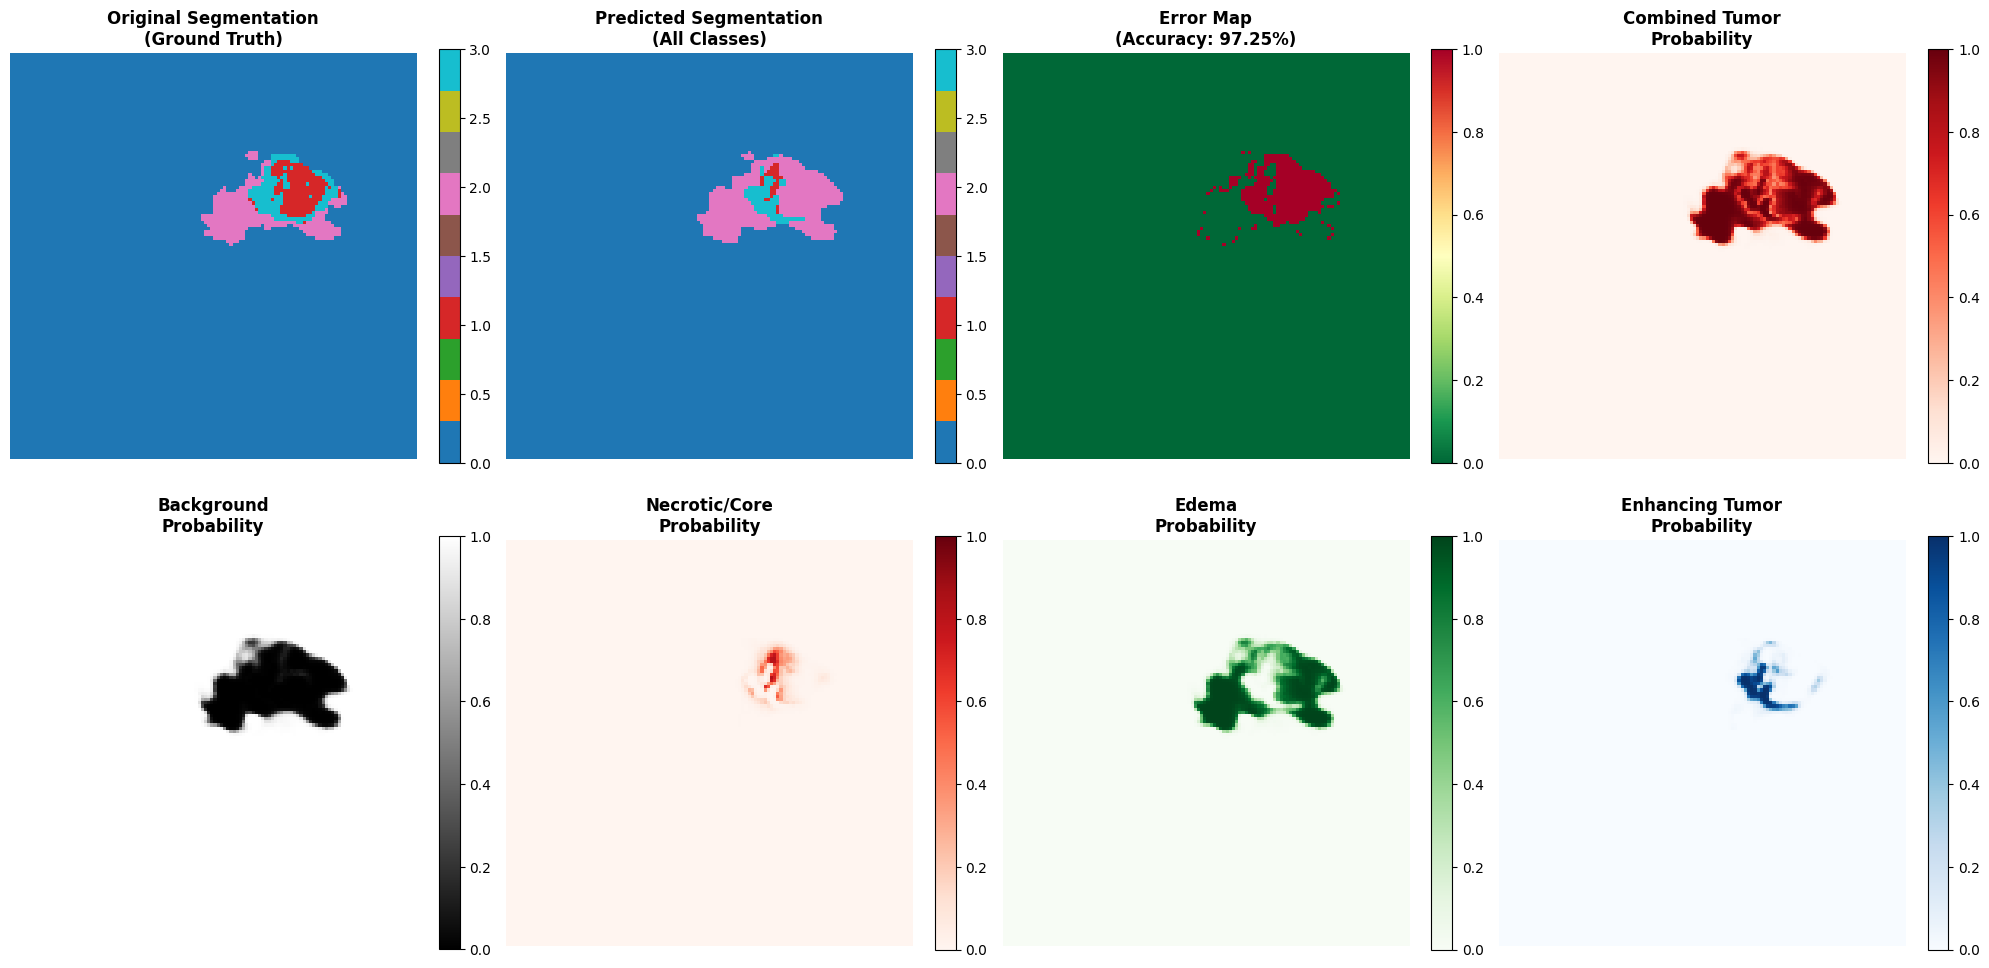


Slice 60 Statistics:

Ground Truth:
  Background  :  15600 pixels (95.21%)
  Necrotic    :    213 pixels ( 1.30%)
  Edema       :    373 pixels ( 2.28%)
  Enhancing   :      0 pixels ( 0.00%)

Predicted:
  Background  :  15582 pixels (95.10%)
  Necrotic    :     36 pixels ( 0.22%)
  Edema       :    657 pixels ( 4.01%)
  Enhancing   :    109 pixels ( 0.67%)

Dice Scores:
  Background  : 0.9978
  Necrotic    : 0.2249
  Edema       : 0.6777
  Enhancing   : 0.0000



In [ ]:
show_predicted_segmentations(
    model=model_loaded,
    samples_list=train_ids,  # or test_ids
    dataset_path=train_dataset_path,  # or test_dataset_path
    device=device,
    slice_to_plot=60
)

Predicting segmentation for patient: BraTS20_Training_002
Patient number: BraTS20_Training_002


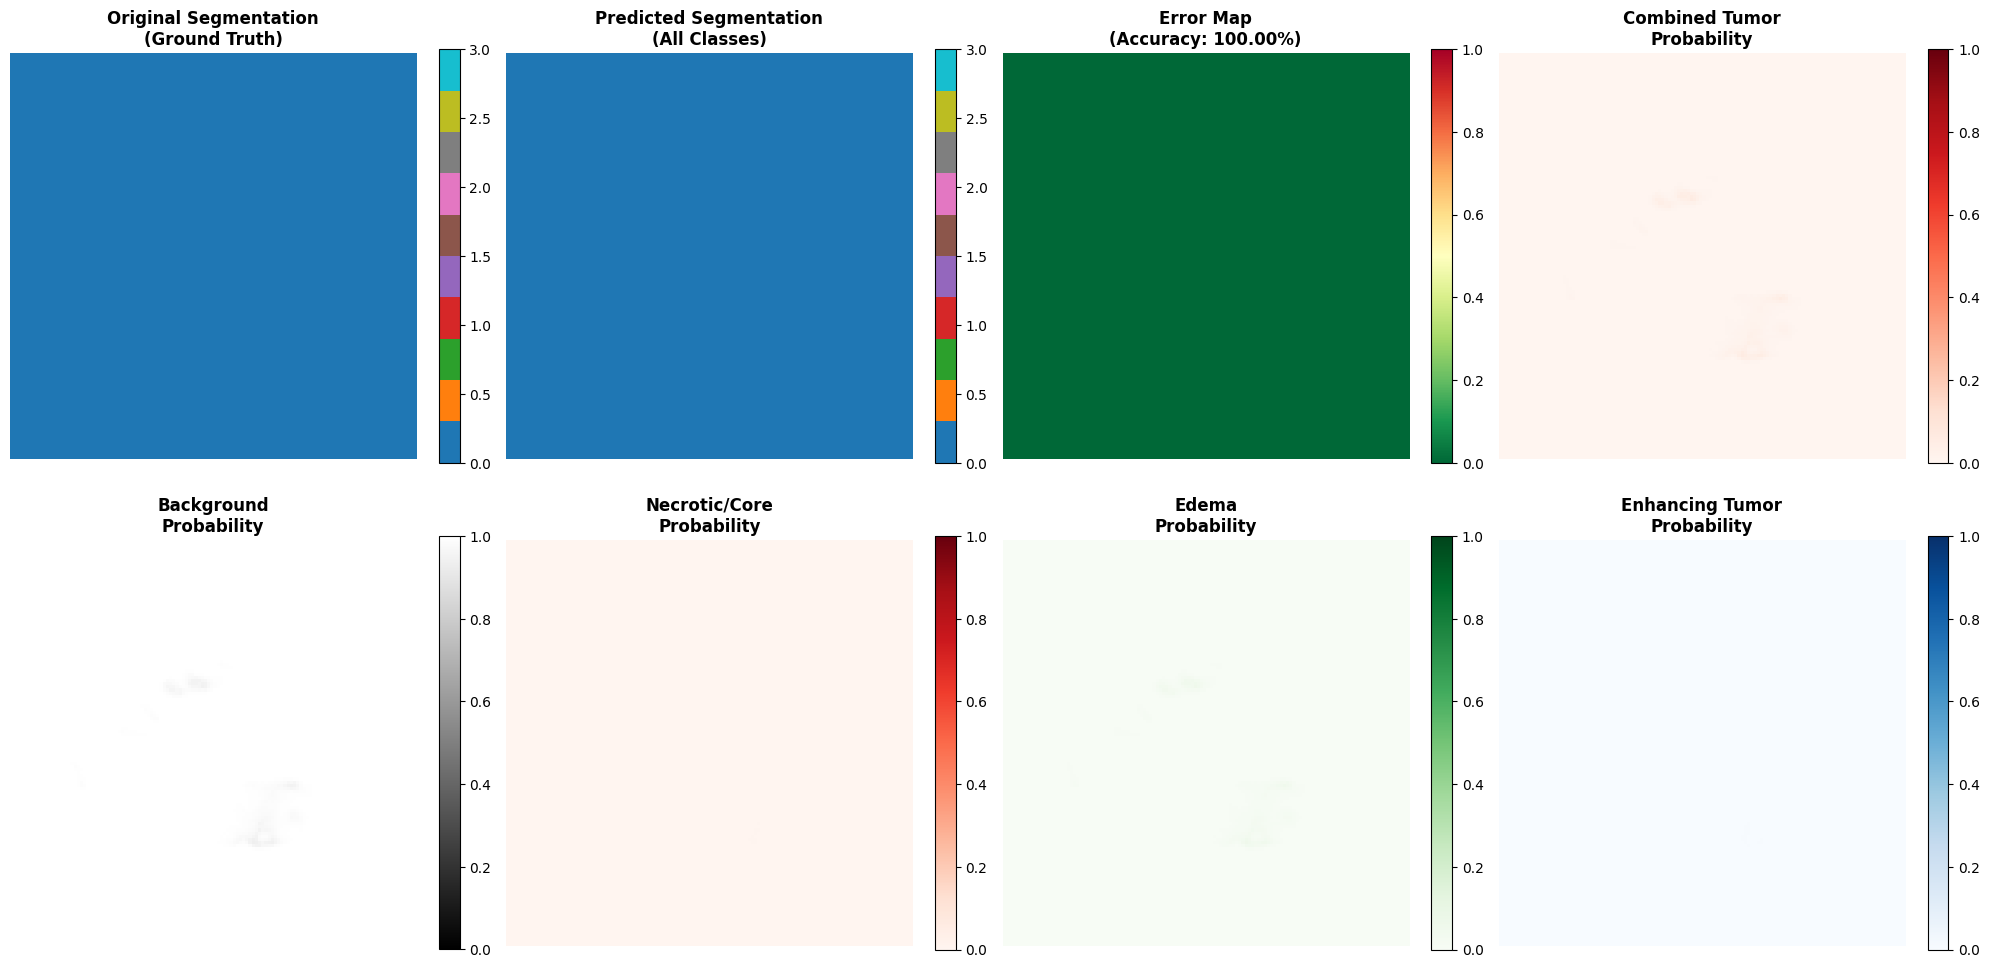


Slice 60 Statistics:

Ground Truth:
  Background  :  16384 pixels (100.00%)
  Necrotic    :      0 pixels ( 0.00%)
  Edema       :      0 pixels ( 0.00%)
  Enhancing   :      0 pixels ( 0.00%)

Predicted:
  Background  :  16384 pixels (100.00%)
  Necrotic    :      0 pixels ( 0.00%)
  Edema       :      0 pixels ( 0.00%)
  Enhancing   :      0 pixels ( 0.00%)

Dice Scores:
  Background  : 1.0000
  Necrotic    : 0.0000
  Edema       : 0.0000
  Enhancing   : 0.0000



In [ ]:
show_predicted_segmentations(
    model=model_loaded,
    samples_list=train_ids,  # or test_ids
    dataset_path=test_dataset_path,  # or test_dataset_path
    device=device,
    slice_to_plot=60
)

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# ============================================================================
# INFERENCE FROM IMAGE FILES
# ============================================================================

def predict_from_images(model, flair_image_path, t1ce_image_path, device,
                        img_size=128, normalize=True):
    """
    Predict segmentation from two image files (FLAIR and T1CE)

    Args:
        model: Trained PyTorch UNet model
        flair_image_path: Path to FLAIR image (PNG, JPG, etc.)
        t1ce_image_path: Path to T1CE image
        device: torch device
        img_size: Size to resize images to (default: 128)
        normalize: Whether to normalize images

    Returns:
        prediction: Predicted class labels (H, W)
        probabilities: Class probabilities (4, H, W)
    """
    model.eval()

    # Load images
    flair = cv2.imread(flair_image_path, cv2.IMREAD_GRAYSCALE)
    t1ce = cv2.imread(t1ce_image_path, cv2.IMREAD_GRAYSCALE)

    # Resize to model input size
    flair = cv2.resize(flair, (img_size, img_size))
    t1ce = cv2.resize(t1ce, (img_size, img_size))

    # Stack channels: (2, H, W)
    image = np.stack([flair, t1ce], axis=0).astype(np.float32)

    # Normalize
    if normalize:
        image = image / (np.max(image) + 1e-8)

    # Convert to tensor and add batch dimension: (1, 2, H, W)
    image_tensor = torch.from_numpy(image).unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        outputs = model(image_tensor)  # (1, 4, H, W)
        probabilities = F.softmax(outputs, dim=1)
        prediction = torch.argmax(probabilities, dim=1)

        # Remove batch dimension and move to CPU
        prediction = prediction.squeeze(0).cpu().numpy()  # (H, W)
        probabilities = probabilities.squeeze(0).cpu().numpy()  # (4, H, W)

    return prediction, probabilities


def predict_from_single_grayscale(model, image_path, device, img_size=128):
    """
    Predict from a single grayscale image (duplicates channel)

    Args:
        model: Trained PyTorch UNet model
        image_path: Path to grayscale image
        device: torch device
        img_size: Size to resize image to

    Returns:
        prediction: Predicted class labels (H, W)
        probabilities: Class probabilities (4, H, W)
    """
    model.eval()

    # Load and preprocess image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (img_size, img_size))

    # Duplicate to 2 channels (if model expects 2 channels)
    image_2ch = np.stack([image, image], axis=0).astype(np.float32)

    # Normalize
    image_2ch = image_2ch / (np.max(image_2ch) + 1e-8)

    # Convert to tensor
    image_tensor = torch.from_numpy(image_2ch).unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = F.softmax(outputs, dim=1)
        prediction = torch.argmax(probabilities, dim=1)

        prediction = prediction.squeeze(0).cpu().numpy()
        probabilities = probabilities.squeeze(0).cpu().numpy()

    return prediction, probabilities


def predict_from_numpy_array(model, image_array, device):
    """
    Predict from numpy array

    Args:
        model: Trained PyTorch UNet model
        image_array: Numpy array of shape (2, H, W) or (H, W, 2)
        device: torch device

    Returns:
        prediction: Predicted class labels (H, W)
        probabilities: Class probabilities (4, H, W)
    """
    model.eval()

    # Handle different input shapes
    if image_array.ndim == 2:
        # Single channel (H, W) -> duplicate to (2, H, W)
        image_array = np.stack([image_array, image_array], axis=0)
    elif image_array.shape[-1] == 2:
        # (H, W, 2) -> (2, H, W)
        image_array = np.transpose(image_array, (2, 0, 1))

    # Ensure float32 and normalize
    image_array = image_array.astype(np.float32)
    image_array = image_array / (np.max(image_array) + 1e-8)

    # Convert to tensor
    image_tensor = torch.from_numpy(image_array).unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = F.softmax(outputs, dim=1)
        prediction = torch.argmax(probabilities, dim=1)

        prediction = prediction.squeeze(0).cpu().numpy()
        probabilities = probabilities.squeeze(0).cpu().numpy()

    return prediction, probabilities


def predict_from_pil_image(model, pil_image_flair, pil_image_t1ce, device, img_size=128):
    """
    Predict from PIL Image objects

    Args:
        model: Trained PyTorch UNet model
        pil_image_flair: PIL Image (FLAIR)
        pil_image_t1ce: PIL Image (T1CE)
        device: torch device
        img_size: Size to resize to

    Returns:
        prediction, probabilities
    """
    model.eval()

    # Convert to grayscale and resize
    flair = pil_image_flair.convert('L').resize((img_size, img_size))
    t1ce = pil_image_t1ce.convert('L').resize((img_size, img_size))

    # Convert to numpy
    flair = np.array(flair, dtype=np.float32)
    t1ce = np.array(t1ce, dtype=np.float32)

    # Stack and normalize
    image = np.stack([flair, t1ce], axis=0)
    image = image / (np.max(image) + 1e-8)

    # Convert to tensor
    image_tensor = torch.from_numpy(image).unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = F.softmax(outputs, dim=1)
        prediction = torch.argmax(probabilities, dim=1)

        prediction = prediction.squeeze(0).cpu().numpy()
        probabilities = probabilities.squeeze(0).cpu().numpy()

    return prediction, probabilities

In [ ]:
# ============================================================================
# VISUALIZATION FUNCTION
# ============================================================================

def visualize_prediction_from_images(flair_path, t1ce_path, model, device,
                                     ground_truth_path=None):
    """
    Visualize prediction from image files

    Args:
        flair_path: Path to FLAIR image
        t1ce_path: Path to T1CE image
        model: Trained model
        device: torch device
        ground_truth_path: Optional path to ground truth segmentation
    """
    # Predict
    prediction, probabilities = predict_from_images(
        model, flair_path, t1ce_path, device
    )

    # Load original images for visualization
    flair = cv2.imread(flair_path, cv2.IMREAD_GRAYSCALE)
    t1ce = cv2.imread(t1ce_path, cv2.IMREAD_GRAYSCALE)
    flair = cv2.resize(flair, (128, 128))
    t1ce = cv2.resize(t1ce, (128, 128))

    # Determine number of subplots
    n_plots = 7 if ground_truth_path else 6
    fig, axes = plt.subplots(1, n_plots, figsize=(4*n_plots, 4))

    # FLAIR
    axes[0].imshow(flair, cmap='gray')
    axes[0].set_title('FLAIR Channel')
    axes[0].axis('off')

    # T1CE
    axes[1].imshow(t1ce, cmap='gray')
    axes[1].set_title('T1CE Channel')
    axes[1].axis('off')

    # Prediction
    axes[2].imshow(prediction, cmap='tab10', vmin=0, vmax=3)
    axes[2].set_title('Predicted Segmentation')
    axes[2].axis('off')

    # Ground truth (if provided)
    plot_offset = 0
    if ground_truth_path:
        gt = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
        gt = cv2.resize(gt, (128, 128), interpolation=cv2.INTER_NEAREST)
        axes[3].imshow(gt, cmap='tab10', vmin=0, vmax=3)
        axes[3].set_title('Ground Truth')
        axes[3].axis('off')
        plot_offset = 1

    # Class probabilities
    class_names = ['Background', 'Necrotic', 'Edema', 'Enhancing']
    cmaps = ['gray', 'Reds', 'Greens', 'Blues']

    for i in range(4):
        ax = axes[3 + plot_offset + i]
        im = ax.imshow(probabilities[i], cmap=cmaps[i], vmin=0, vmax=1)
        ax.set_title(f'{class_names[i]}\nProbability')
        ax.axis('off')
        plt.colorbar(im, ax=ax, fraction=0.046)

    plt.tight_layout()
    plt.show()

    # Print statistics
    print("Prediction Statistics:")
    for i, name in enumerate(class_names):
        count = (prediction == i).sum()
        percentage = 100 * count / prediction.size
        print(f"{name:12}: {count:5} pixels ({percentage:5.2f}%)")


# ============================================================================
# BATCH PROCESSING FROM IMAGE FOLDER
# ============================================================================

def predict_from_image_folder(model, folder_path, device, pattern='*.png'):
    """
    Process all images in a folder

    Args:
        model: Trained model
        folder_path: Path to folder containing images
        device: torch device
        pattern: File pattern to match (e.g., '*.png', '*.jpg')

    Returns:
        predictions: Dictionary mapping filename to prediction
    """
    import glob

    model.eval()
    predictions = {}

    # Find all matching files
    image_files = glob.glob(os.path.join(folder_path, pattern))

    print(f"Found {len(image_files)} images in {folder_path}")

    for img_path in image_files:
        filename = os.path.basename(img_path)

        # Assume we need 2 channels - duplicate the image
        prediction, probabilities = predict_from_single_grayscale(
            model, img_path, device
        )

        predictions[filename] = {
            'prediction': prediction,
            'probabilities': probabilities
        }

        print(f"Processed: {filename}")

    return predictions

In [ ]:


# ============================================================================
# USAGE EXAMPLES
# ============================================================================

# Example 1: Predict from two separate image files
print("Example 1: Two image files")
prediction, probabilities = predict_from_images(
    model=model,
    flair_image_path='path/to/flair_slice.png',
    t1ce_image_path='path/to/t1ce_slice.png',
    device=device
)

print(f"Prediction shape: {prediction.shape}")
print(f"Probabilities shape: {probabilities.shape}")
print(f"Unique classes: {np.unique(prediction)}")

In [ ]:

# Example 2: Predict from single grayscale image
print("\nExample 2: Single grayscale image")
prediction, probabilities = predict_from_single_grayscale(
    model=model,
    image_path='path/to/brain_slice.png',
    device=device
)


In [ ]:

# Example 3: Predict from numpy array
print("\nExample 3: Numpy array")
# Create dummy data (replace with your actual data)
dummy_image = np.random.rand(2, 128, 128).astype(np.float32)
prediction, probabilities = predict_from_numpy_array(
    model=model,
    image_array=dummy_image,
    device=device
)

In [ ]:

# Example 4: Visualize prediction
print("\nExample 4: Visualize prediction")
visualize_prediction_from_images(
    flair_path='path/to/flair.png',
    t1ce_path='path/to/t1ce.png',
    model=model,
    device=device,
    ground_truth_path='path/to/ground_truth.png'  # Optional
)

In [ ]:

# Example 5: Process entire folder
print("\nExample 5: Batch processing")
predictions = predict_from_image_folder(
    model=model,
    folder_path='path/to/image/folder',
    device=device,
    pattern='*.png'
)


In [ ]:

# Example 6: Load from PIL and predict
print("\nExample 6: PIL Image")
from PIL import Image

pil_flair = Image.open('path/to/flair.png')
pil_t1ce = Image.open('path/to/t1ce.png')

prediction, probabilities = predict_from_pil_image(
    model=model,
    pil_image_flair=pil_flair,
    pil_image_t1ce=pil_t1ce,
    device=device
)

In [ ]:


# ============================================================================
# SAVE PREDICTIONS AS IMAGES
# ============================================================================

def save_prediction_as_image(prediction, save_path, colormap='tab10'):
    """
    Save prediction as colored image

    Args:
        prediction: Prediction array (H, W)
        save_path: Path to save image
        colormap: Matplotlib colormap to use
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(prediction, cmap=colormap, vmin=0, vmax=3)
    plt.axis('off')
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi=150)
    plt.close()

    print(f"Prediction saved to: {save_path}")

# Save prediction
save_prediction_as_image(prediction, 'prediction_output.png')


# ============================================================================
# EXPORT TO OTHER FORMATS
# ============================================================================

def export_prediction(prediction, probabilities, output_dir='outputs'):
    """
    Export prediction in multiple formats

    Args:
        prediction: Class predictions (H, W)
        probabilities: Class probabilities (4, H, W)
        output_dir: Directory to save outputs
    """
    os.makedirs(output_dir, exist_ok=True)

    # Save as numpy
    np.save(os.path.join(output_dir, 'prediction.npy'), prediction)
    np.save(os.path.join(output_dir, 'probabilities.npy'), probabilities)

    # Save as PNG (colored)
    save_prediction_as_image(
        prediction,
        os.path.join(output_dir, 'prediction_colored.png')
    )

    # Save individual class probabilities
    class_names = ['background', 'necrotic', 'edema', 'enhancing']
    for i, name in enumerate(class_names):
        cv2.imwrite(
            os.path.join(output_dir, f'prob_{name}.png'),
            (probabilities[i] * 255).astype(np.uint8)
        )

    print(f"All outputs saved to: {output_dir}")

# Use it
export_prediction(prediction, probabilities, output_dir='my_predictions')

Prediction saved to: prediction_output.png
Prediction saved to: my_predictions/prediction_colored.png
All outputs saved to: my_predictions


In [ ]:
import nibabel as nib
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os

# ============================================================================
# BASIC CONVERSION: .nii TO GRAYSCALE IMAGE
# ============================================================================

def nii_to_image_single_slice(nii_path, slice_idx, save_path=None,
                               resize=None, normalize=True):
    """
    Convert a single slice from .nii file to grayscale image

    Args:
        nii_path: Path to .nii file
        slice_idx: Which slice to extract (0 to num_slices-1)
        save_path: Path to save image (optional)
        resize: Tuple (width, height) to resize, or None
        normalize: Whether to normalize to 0-255

    Returns:
        image: Grayscale image as numpy array
    """
    # Load .nii file
    nii_data = nib.load(nii_path).get_fdata()

    print(f"Original .nii shape: {nii_data.shape}")
    print(f"Data range: {nii_data.min()} to {nii_data.max()}")

    # Extract slice (assuming shape is (W, H, D))
    slice_2d = nii_data[:, :, slice_idx]

    # Normalize to 0-255
    if normalize:
        slice_2d = slice_2d - slice_2d.min()
        slice_2d = 255 * (slice_2d / (slice_2d.max() + 1e-8))

    # Convert to uint8
    image = slice_2d.astype(np.uint8)

    # Resize if requested
    if resize:
        image = cv2.resize(image, resize, interpolation=cv2.INTER_LINEAR)

    # Save if path provided
    if save_path:
        cv2.imwrite(save_path, image)
        print(f"Saved to: {save_path}")

    return image


# ============================================================================
# CONVERT ALL SLICES FROM .nii FILE
# ============================================================================

def nii_to_images_all_slices(nii_path, output_dir, prefix='slice',
                             resize=(128, 128), normalize=True):
    """
    Convert all slices from .nii file to separate images

    Args:
        nii_path: Path to .nii file
        output_dir: Directory to save images
        prefix: Prefix for filenames
        resize: Size to resize images to
        normalize: Whether to normalize

    Returns:
        num_slices: Number of slices extracted
    """
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    # Load .nii file
    nii_data = nib.load(nii_path).get_fdata()
    num_slices = nii_data.shape[2]

    print(f"Processing {num_slices} slices from {nii_path}")

    for i in range(num_slices):
        # Extract slice
        slice_2d = nii_data[:, :, i]

        # Normalize
        if normalize:
            slice_2d = slice_2d - slice_2d.min()
            slice_2d = 255 * (slice_2d / (slice_2d.max() + 1e-8))

        # Convert to uint8
        image = slice_2d.astype(np.uint8)

        # Resize
        if resize:
            image = cv2.resize(image, resize, interpolation=cv2.INTER_LINEAR)

        # Save
        filename = f"{prefix}_{i:03d}.png"
        filepath = os.path.join(output_dir, filename)
        cv2.imwrite(filepath, image)

        if (i + 1) % 20 == 0:
            print(f"Processed {i + 1}/{num_slices} slices")

    print(f"Done! All {num_slices} slices saved to {output_dir}")
    return num_slices


# ============================================================================
# CONVERT SPECIFIC RANGE OF SLICES
# ============================================================================

def nii_to_images_range(nii_path, output_dir, start_slice=50, num_slices=75,
                        resize=(128, 128), normalize=True):
    """
    Convert specific range of slices (useful for brain tumor dataset)

    Args:
        nii_path: Path to .nii file
        output_dir: Directory to save images
        start_slice: Starting slice index
        num_slices: Number of slices to extract
        resize: Size to resize to
        normalize: Whether to normalize
    """
    os.makedirs(output_dir, exist_ok=True)

    nii_data = nib.load(nii_path).get_fdata()

    print(f"Extracting slices {start_slice} to {start_slice + num_slices - 1}")

    for i in range(num_slices):
        slice_idx = start_slice + i
        slice_2d = nii_data[:, :, slice_idx]

        # Normalize
        if normalize:
            slice_2d = slice_2d - slice_2d.min()
            slice_2d = 255 * (slice_2d / (slice_2d.max() + 1e-8))

        image = slice_2d.astype(np.uint8)

        if resize:
            image = cv2.resize(image, resize, interpolation=cv2.INTER_LINEAR)

        filename = f"slice_{slice_idx:03d}.png"
        cv2.imwrite(os.path.join(output_dir, filename), image)

    print(f"Saved {num_slices} slices to {output_dir}")


# ============================================================================
# CONVERT BRAIN TUMOR DATASET (MULTIPLE MODALITIES)
# ============================================================================

def convert_brain_tumor_case(case_path, case_id, output_dir,
                             start_slice=50, num_slices=75, resize=(128, 128)):
    """
    Convert a complete BraTS case (FLAIR, T1CE, segmentation) to images

    Args:
        case_path: Path to case directory
        case_id: Case ID (e.g., 'BraTS20_Training_001')
        output_dir: Base output directory
        start_slice: Starting slice
        num_slices: Number of slices to extract
        resize: Size to resize to
    """
    # Create subdirectories for each modality
    flair_dir = os.path.join(output_dir, case_id, 'flair')
    t1ce_dir = os.path.join(output_dir, case_id, 't1ce')
    seg_dir = os.path.join(output_dir, case_id, 'seg')

    os.makedirs(flair_dir, exist_ok=True)
    os.makedirs(t1ce_dir, exist_ok=True)
    os.makedirs(seg_dir, exist_ok=True)

    # Load all modalities
    flair_path = os.path.join(case_path, f'{case_id}_flair.nii')
    t1ce_path = os.path.join(case_path, f'{case_id}_t1ce.nii')
    seg_path = os.path.join(case_path, f'{case_id}_seg.nii')

    flair = nib.load(flair_path).get_fdata()
    t1ce = nib.load(t1ce_path).get_fdata()
    seg = nib.load(seg_path).get_fdata()

    print(f"Converting case: {case_id}")

    for i in range(num_slices):
        slice_idx = start_slice + i

        # FLAIR
        flair_slice = flair[:, :, slice_idx]
        flair_slice = flair_slice - flair_slice.min()
        flair_slice = 255 * (flair_slice / (flair_slice.max() + 1e-8))
        flair_img = cv2.resize(flair_slice.astype(np.uint8), resize)
        cv2.imwrite(os.path.join(flair_dir, f'slice_{i:03d}.png'), flair_img)

        # T1CE
        t1ce_slice = t1ce[:, :, slice_idx]
        t1ce_slice = t1ce_slice - t1ce_slice.min()
        t1ce_slice = 255 * (t1ce_slice / (t1ce_slice.max() + 1e-8))
        t1ce_img = cv2.resize(t1ce_slice.astype(np.uint8), resize)
        cv2.imwrite(os.path.join(t1ce_dir, f'slice_{i:03d}.png'), t1ce_img)

        # Segmentation (use INTER_NEAREST to preserve labels)
        seg_slice = seg[:, :, slice_idx]
        seg_slice[seg_slice == 4] = 3  # Convert label 4 to 3
        seg_img = cv2.resize(seg_slice, resize, interpolation=cv2.INTER_NEAREST)
        cv2.imwrite(os.path.join(seg_dir, f'slice_{i:03d}.png'), seg_img.astype(np.uint8))

    print(f"Saved {num_slices} slices for each modality")


# ============================================================================
# VISUALIZE SLICES BEFORE SAVING
# ============================================================================

def preview_nii_slices(nii_path, slices_to_show=[50, 75, 100], figsize=(15, 5)):
    """
    Preview specific slices from .nii file before converting

    Args:
        nii_path: Path to .nii file
        slices_to_show: List of slice indices to preview
        figsize: Figure size
    """
    nii_data = nib.load(nii_path).get_fdata()

    fig, axes = plt.subplots(1, len(slices_to_show), figsize=figsize)

    if len(slices_to_show) == 1:
        axes = [axes]

    for idx, slice_num in enumerate(slices_to_show):
        slice_2d = nii_data[:, :, slice_num]
        axes[idx].imshow(slice_2d, cmap='gray')
        axes[idx].set_title(f'Slice {slice_num}')
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()


# ============================================================================
# BATCH CONVERT ENTIRE DATASET
# ============================================================================

def convert_entire_dataset(dataset_path, output_base_dir, case_ids,
                           start_slice=50, num_slices=75):
    """
    Convert entire BraTS dataset to images

    Args:
        dataset_path: Path to BraTS dataset
        output_base_dir: Base directory for output
        case_ids: List of case IDs
        start_slice: Starting slice
        num_slices: Number of slices per case
    """
    total_cases = len(case_ids)

    for idx, case_id in enumerate(case_ids):
        print(f"\n[{idx + 1}/{total_cases}] Processing {case_id}")

        case_path = os.path.join(dataset_path, case_id)

        try:
            convert_brain_tumor_case(
                case_path=case_path,
                case_id=case_id,
                output_dir=output_base_dir,
                start_slice=start_slice,
                num_slices=num_slices
            )
        except Exception as e:
            print(f"Error processing {case_id}: {e}")

    print(f"\n{'='*60}")
    print(f"Conversion complete! Processed {total_cases} cases")
    print(f"Output saved to: {output_base_dir}")
    print(f"{'='*60}")


# ============================================================================
# CONVERT WITH DIFFERENT NORMALIZATIONS
# ============================================================================

def nii_to_image_custom_normalization(nii_path, slice_idx, save_path,
                                     norm_method='min-max'):
    """
    Convert with different normalization methods

    Args:
        norm_method: 'min-max', 'percentile', 'z-score'
    """
    nii_data = nib.load(nii_path).get_fdata()
    slice_2d = nii_data[:, :, slice_idx]

    if norm_method == 'min-max':
        # Standard min-max normalization
        slice_2d = slice_2d - slice_2d.min()
        slice_2d = 255 * (slice_2d / (slice_2d.max() + 1e-8))

    elif norm_method == 'percentile':
        # Use percentile to handle outliers
        p1, p99 = np.percentile(slice_2d, [1, 99])
        slice_2d = np.clip(slice_2d, p1, p99)
        slice_2d = slice_2d - p1
        slice_2d = 255 * (slice_2d / (p99 - p1 + 1e-8))

    elif norm_method == 'z-score':
        # Z-score normalization
        mean = slice_2d.mean()
        std = slice_2d.std()
        slice_2d = (slice_2d - mean) / (std + 1e-8)
        slice_2d = np.clip(slice_2d, -3, 3)  # Clip to ±3 std
        slice_2d = 255 * (slice_2d + 3) / 6  # Map to 0-255

    image = slice_2d.astype(np.uint8)
    cv2.imwrite(save_path, image)
    return image

In [ ]:
img =  nii_to_image_single_slice(
    '/content/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/BraTS20_Validation_001/BraTS20_Validation_001_flair.nii',
    slice_idx=75,
    save_path='slice75.png'
)

Original .nii shape: (240, 240, 155)
Data range: 0.0 to 872.0
Saved to: slice75.png


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet(in_channels=2, num_classes=4, dropout=0.3)
model.load_state_dict(torch.load('model_weights.pth', map_location=device))
model.to(device)
model.eval()

In [ ]:
preds, probs = predict_from_single_grayscale(model_loaded, "/content/slice75.png", device)

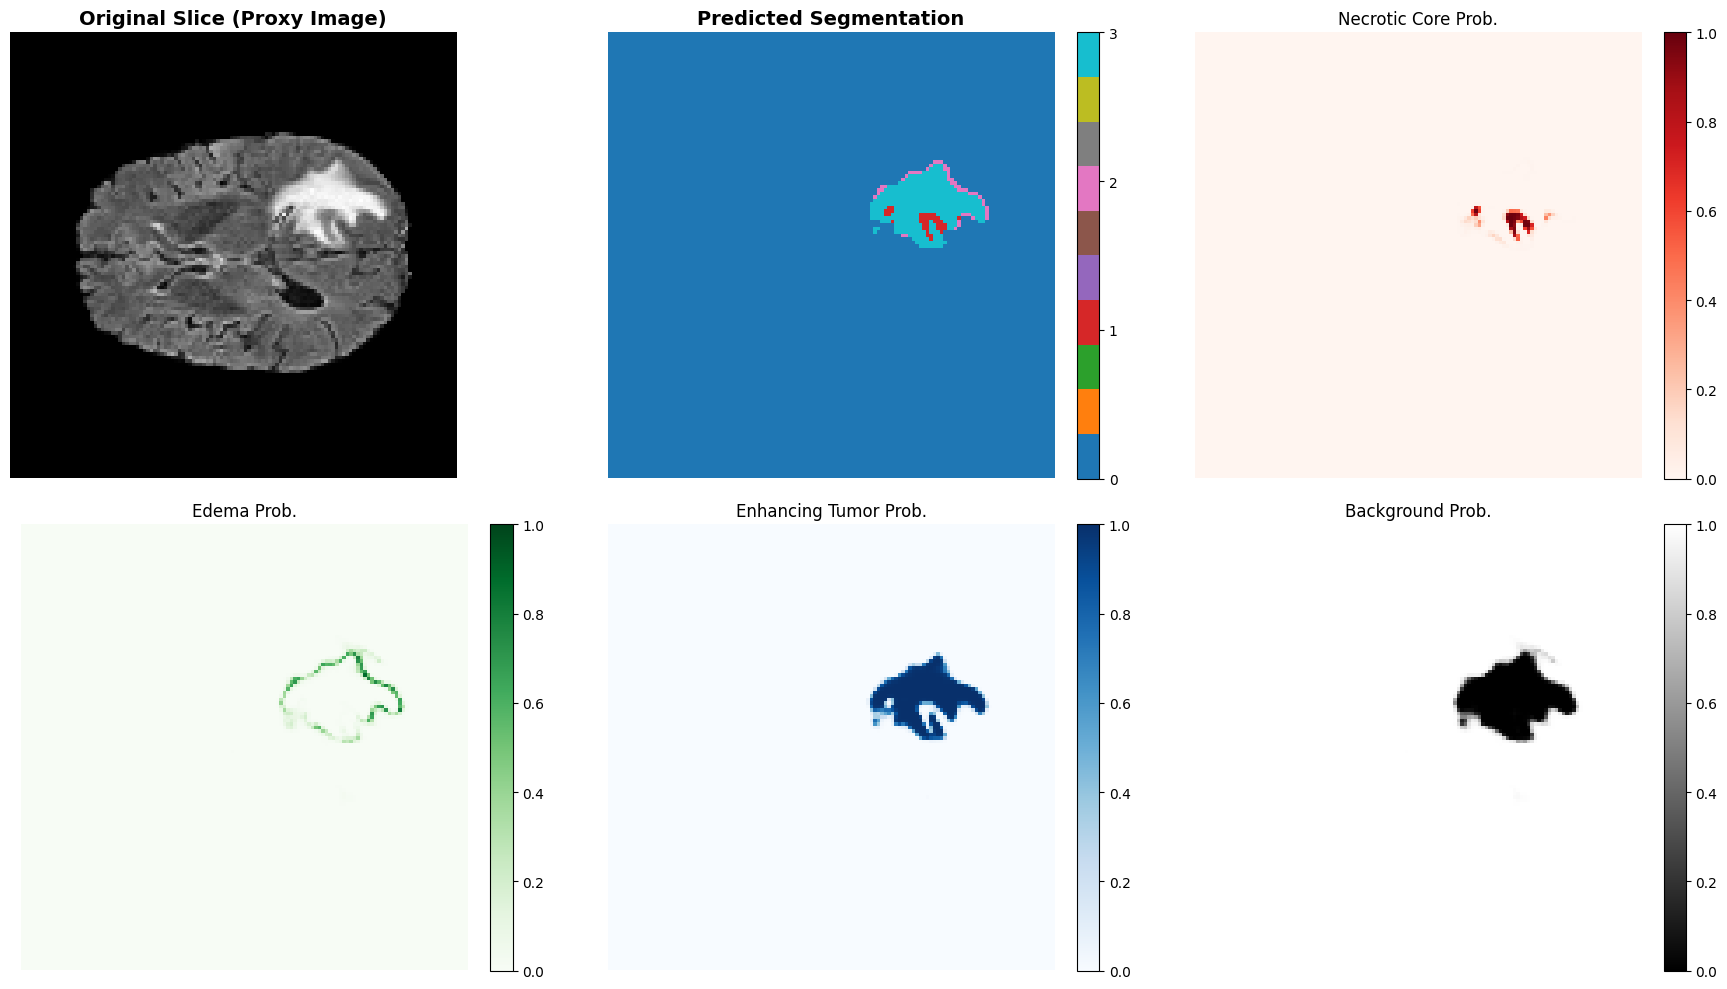

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the original image used for prediction and resize to match model output
original_img = cv2.imread("/content/slice75.png", cv2.IMREAD_GRAYSCALE)
original_img = cv2.resize(original_img, (128, 128))

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Original Image
axes[0, 0].imshow(original_img, cmap='gray')
axes[0, 0].set_title('Original Slice (Proxy Image)', fontsize=14, fontweight='bold')
axes[0, 0].axis('off')

# 2. Predicted Segmentation Mask
# Using tab10 colormap for distinct class visualization
im_preds = axes[0, 1].imshow(preds, cmap='tab10', vmin=0, vmax=3)
axes[0, 1].set_title('Predicted Segmentation', fontsize=14, fontweight='bold')
axes[0, 1].axis('off')
plt.colorbar(im_preds, ax=axes[0, 1], fraction=0.046, pad=0.04, ticks=[0, 1, 2, 3])

# 3. Necrotic Core Probability (Class 1)
im1 = axes[0, 2].imshow(probs[1], cmap='Reds', vmin=0, vmax=1)
axes[0, 2].set_title('Necrotic Core Prob.', fontsize=12)
axes[0, 2].axis('off')
plt.colorbar(im1, ax=axes[0, 2], fraction=0.046, pad=0.04)

# 4. Edema Probability (Class 2)
im2 = axes[1, 0].imshow(probs[2], cmap='Greens', vmin=0, vmax=1)
axes[1, 0].set_title('Edema Prob.', fontsize=12)
axes[1, 0].axis('off')
plt.colorbar(im2, ax=axes[1, 0], fraction=0.046, pad=0.04)

# 5. Enhancing Tumor Probability (Class 3)
im3 = axes[1, 1].imshow(probs[3], cmap='Blues', vmin=0, vmax=1)
axes[1, 1].set_title('Enhancing Tumor Prob.', fontsize=12)
axes[1, 1].axis('off')
plt.colorbar(im3, ax=axes[1, 1], fraction=0.046, pad=0.04)

# 6. Background Probability (Class 0)
im0 = axes[1, 2].imshow(probs[0], cmap='gray', vmin=0, vmax=1)
axes[1, 2].set_title('Background Prob.', fontsize=12)
axes[1, 2].axis('off')
plt.colorbar(im0, ax=axes[1, 2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()